In [189]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [190]:
# Import data
train_data = pd.read_csv(r'/content/train_values.csv')
train_labels = pd.read_csv(r'/content/train_labels.csv')
test_data = pd.read_csv(r'/content/test_values.csv')

In [191]:
print(train_data.shape)
train_data.head(5)

(180, 14)


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [192]:
print(train_labels.shape)
train_labels.head(5)

(180, 2)


,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [193]:
print(test_data.shape)
test_data.head(5)

(90, 14)


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


#### Analysing the 'train_data' dataset

In [194]:
# Renaming the columns
train_data.columns = ["patient_id", "slope", "thal", "rbs", "chest_pain", "vessels", "fasting_blood_sugar", "resting_ekg",
                      "cholesterol", "depression", "sex", "age", "heart_rate", "angina"]

print(train_data.shape)
train_data.head(5)

(180, 14)


,patient_id,slope,thal,rbs,chest_pain,vessels,fasting_blood_sugar,resting_ekg,cholesterol,depression,sex,age,heart_rate,angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [195]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           180 non-null    object 
 1   slope                180 non-null    int64  
 2   thal                 180 non-null    object 
 3   rbs                  180 non-null    int64  
 4   chest_pain           180 non-null    int64  
 5   vessels              180 non-null    int64  
 6   fasting_blood_sugar  180 non-null    int64  
 7   resting_ekg          180 non-null    int64  
 8   cholesterol          180 non-null    int64  
 9   depression           180 non-null    float64
 10  sex                  180 non-null    int64  
 11  age                  180 non-null    int64  
 12  heart_rate           180 non-null    int64  
 13  angina               180 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 19.8+ KB


In [196]:
# We have 1 object column 'thal', so let's deal with it so that it will be easier to analyse later
train_data['thal'].value_counts()

,count
thal,
normal,98
reversible_defect,74
fixed_defect,8


In [197]:
train_data['thal'] = train_data['thal'].map({'normal':0, 'reversible_defect':1, 'fixed_defect':2})
train_data.head(5)

,patient_id,slope,thal,rbs,chest_pain,vessels,fasting_blood_sugar,resting_ekg,cholesterol,depression,sex,age,heart_rate,angina
0,0z64un,1,0,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,0,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,0,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,1,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,1,178,1,0,0,2,270,4.2,1,59,145,0


In [198]:
train_labels.head(5)

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [199]:
# Concat the 'target' column in our original dataset
train_data["heart_disease"] = train_labels["heart_disease_present"]
train_data.head(5)

,patient_id,slope,thal,rbs,chest_pain,vessels,fasting_blood_sugar,resting_ekg,cholesterol,depression,sex,age,heart_rate,angina,heart_disease
0,0z64un,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,0,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,1,178,1,0,0,2,270,4.2,1,59,145,0,0


In [200]:
# Drop off the 'patient_id' column
train_data = train_data.drop("patient_id", axis=1)
train_data.head(5)

,slope,thal,rbs,chest_pain,vessels,fasting_blood_sugar,resting_ekg,cholesterol,depression,sex,age,heart_rate,angina,heart_disease
0,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,0,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,1,178,1,0,0,2,270,4.2,1,59,145,0,0


#### Analysing the 'test_data' dataset

In [201]:
print(test_data.shape)
test_data.head(5)

(90, 14)


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [202]:
# Renaming the columns
test_data.columns = ["patient_id", "slope", "thal", "rbs", "chest_pain", "vessels", "fasting_blood_sugar", "resting_ekg",
                      "cholesterol", "depression", "sex", "age", "heart_rate", "angina"]

print(test_data.shape)
test_data.head(5)

(90, 14)


,patient_id,slope,thal,rbs,chest_pain,vessels,fasting_blood_sugar,resting_ekg,cholesterol,depression,sex,age,heart_rate,angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [203]:
# Let's deal with 'thal' column, so that it will be easy to analyse later
test_data['thal'] = test_data['thal'].map({'normal':0, 'reversible_defect':1, 'fixed_defect':2})
test_data.head(5)

,patient_id,slope,thal,rbs,chest_pain,vessels,fasting_blood_sugar,resting_ekg,cholesterol,depression,sex,age,heart_rate,angina
0,olalu7,2,1,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,0,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,1,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,0,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,0,138,4,1,0,2,166,3.6,1,61,125,1


### Exploratory data analysis

In [204]:
train_data.describe()

,slope,thal,rbs,chest_pain,vessels,fasting_blood_sugar,resting_ekg,cholesterol,depression,sex,age,heart_rate,angina,heart_disease
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,0.500000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,0.583765,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,0.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,0.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,0.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,1.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,2.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [205]:
categorical_val = []
continous_val = []

for column in train_data.columns:
    if len(train_data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [206]:
print("Categorical features: ")
categorical_val

Categorical features: 


['slope',
 'thal',
 'chest_pain',
 'vessels',
 'fasting_blood_sugar',
 'resting_ekg',
 'sex',
 'angina',
 'heart_disease']

In [207]:
print("Continous features: ")
continous_val

Continous features: 


['rbs', 'cholesterol', 'depression', 'age', 'heart_rate']

##### 1. Age

In [208]:
minAge = min(train_data.age)
maxAge = max(train_data.age)
print('Min Age :', minAge)
print('Max Age :', maxAge)

Min Age : 29
Max Age : 77


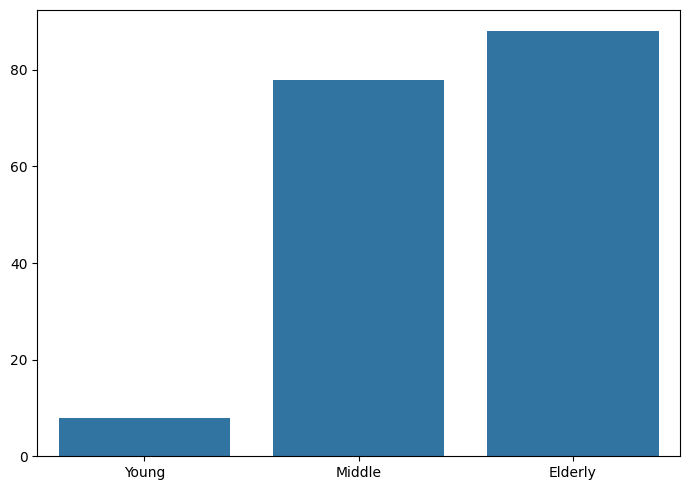

In [209]:
# Dividing the Age feature into three parts – “Young”, “Middle” and “Elder”
Young = train_data[(train_data.age>=29) & (train_data.age<40)]
Middle = train_data[(train_data.age>=40) & (train_data.age<55)]
Elder = train_data[(train_data.age>55)]

plt.figure(figsize=(7,5))
sns.barplot(x=['Young', 'Middle','Elderly'], y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

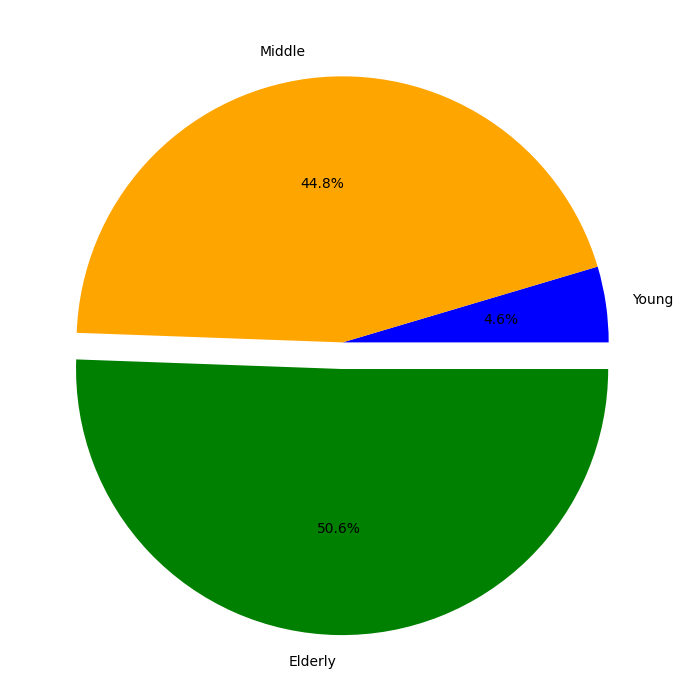

In [210]:
colors = ['blue','orange','green']
explode = [0,0,0.1]
plt.figure(figsize=(7,7))
plt.pie([len(Young),len(Middle),len(Elder)], labels=['Young','Middle','Elderly'],
        explode=explode, colors=colors, autopct='%1.1f%%')
plt.tight_layout()

##### Clearly, elderly people are the most affected by heart disease and young ones are the least affected.

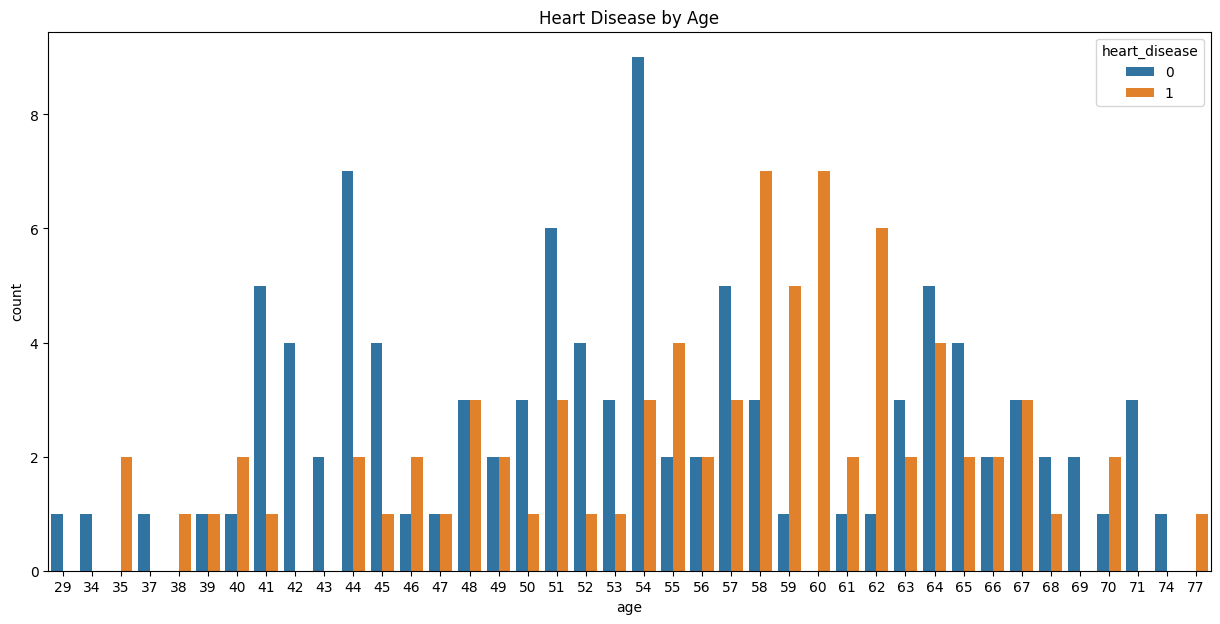

In [211]:
# Plot distribution of Age
# It is clear that older people have more risk getting heart disease (which is expected)
plt.figure(figsize=(15,7))
sns.countplot(x = 'age', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Age")
plt.show()

##### 2. Slope

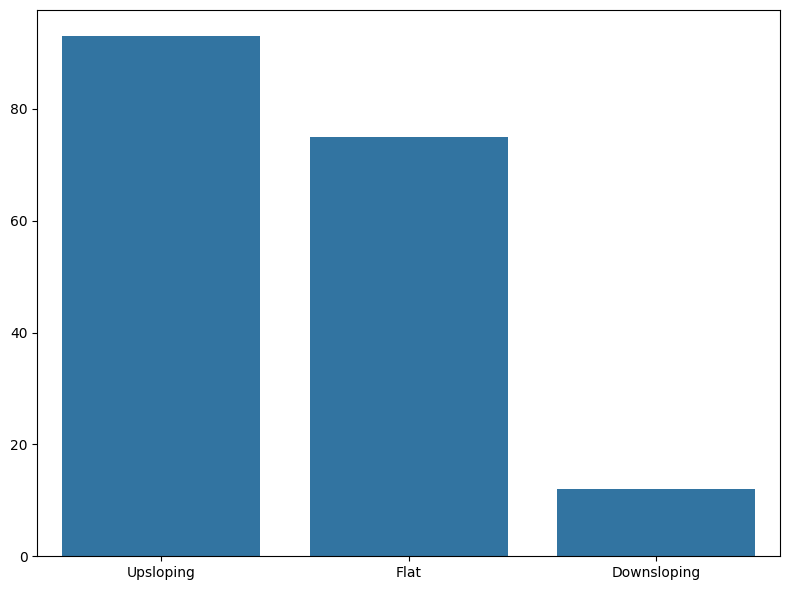

In [212]:
# Plot distribution of slope column
upsloping = train_data[(train_data.slope == 1)]
flat = train_data[(train_data.slope == 2)]
downsloping = train_data[(train_data.slope == 3)]

plt.figure(figsize=(8,6))
sns.barplot(x=['Upsloping', 'Flat','Downsloping'], y=[len(upsloping),len(flat),len(downsloping)])
plt.tight_layout()

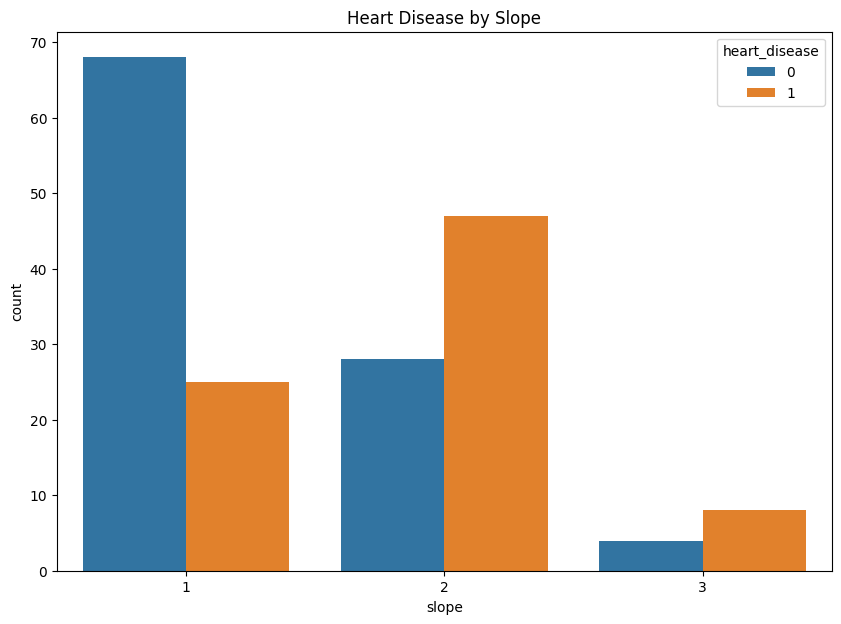

In [213]:
# Plot distribution of slope column with hue on heart_disease
plt.figure(figsize=(10,7))
sns.countplot(x = 'slope', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Slope")
plt.show()

##### 3. Sex

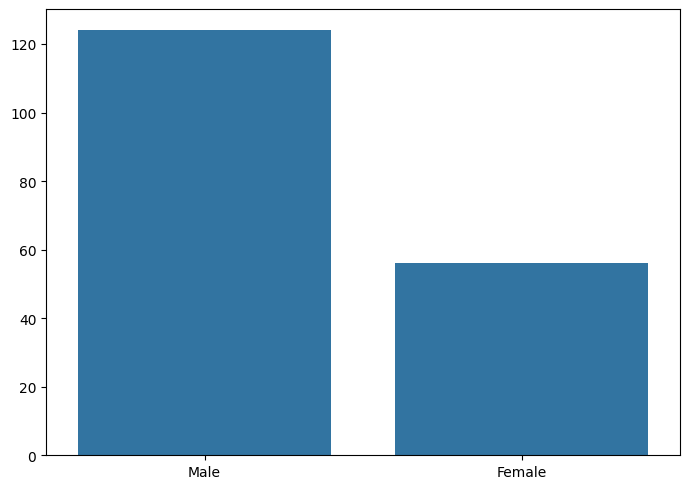

In [214]:
# Plot distribution of sex column
# It is clear that the ratio of Male:Female is approx 2:1.
Male = train_data[(train_data.sex==1)]
Female = train_data[(train_data.sex==0)]

plt.figure(figsize=(7,5))
sns.barplot(x=['Male', 'Female'], y=[len(Male),len(Female)])
plt.tight_layout()

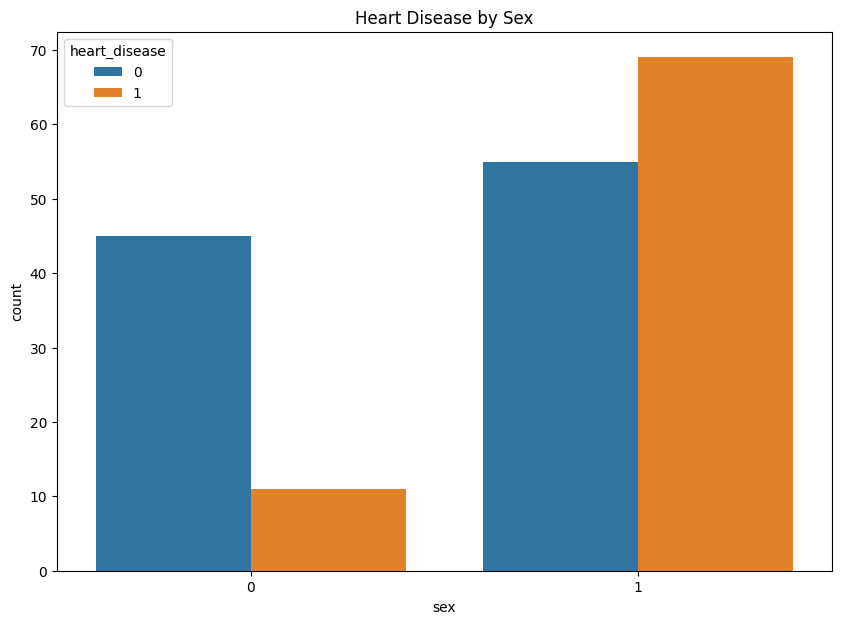

In [215]:
# Plot distribution of sex column with huse on heart_disease
plt.figure(figsize=(10,7))
sns.countplot(x = 'sex', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Sex")
plt.show()

##### Clearly, Males are more likely to have a heart disease.

##### 4. Chest pain type

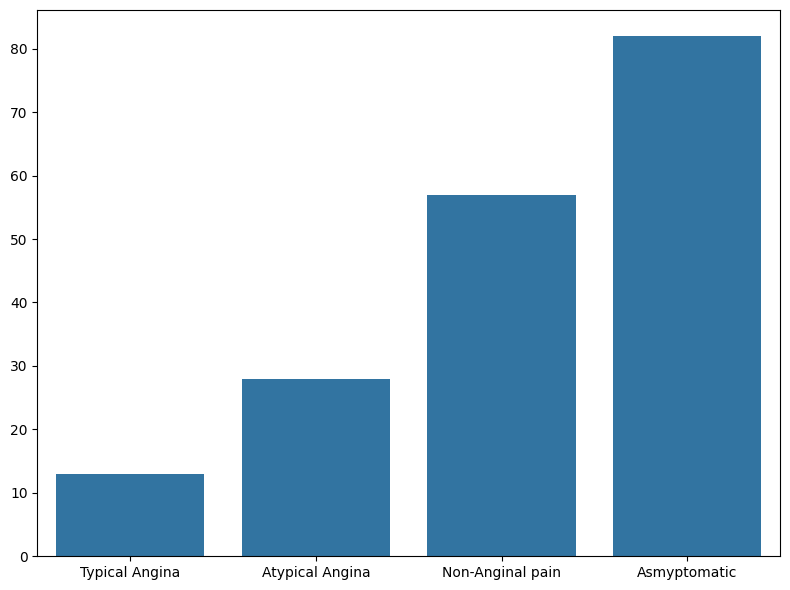

In [216]:
# Plot distribution of chest_pain column
typical_angina = train_data[(train_data.chest_pain == 1)]
atypical_angina = train_data[(train_data.chest_pain == 2)]
non_anginal_pain = train_data[(train_data.chest_pain == 3)]
asymptomatic = train_data[(train_data.chest_pain == 4)]

plt.figure(figsize=(8,6))
sns.barplot(x=['Typical Angina','Atypical Angina','Non-Anginal pain','Asmyptomatic'],
            y=[len(typical_angina),len(atypical_angina),len(non_anginal_pain),len(asymptomatic)])
plt.tight_layout()

##### There are 4 types of chest pain :
##### 1. condition least distressed
##### 2. condition slightly distressed
##### 3. condition medium distressed
##### 4. condition too bad

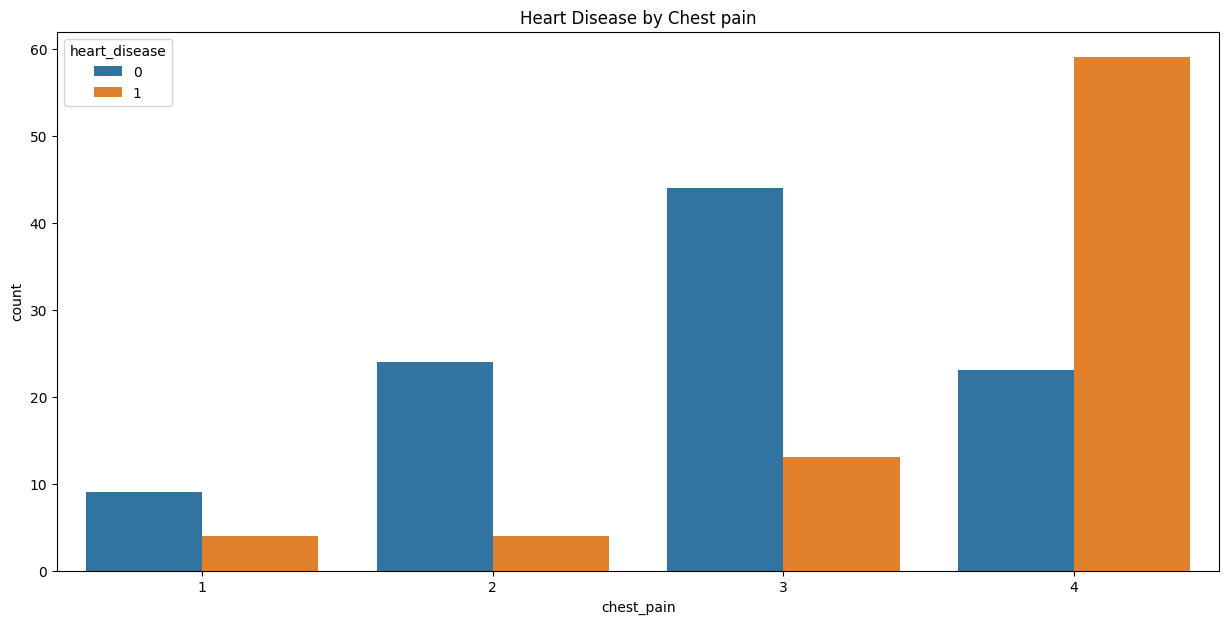

In [217]:
# Plot distribution of chest_pain_type
# It is clear that people having severe chest pain are likely to have heart disease
plt.figure(figsize=(15,7))
sns.countplot(x = 'chest_pain', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Chest pain")
plt.show()

##### It is clear that people having severe chest pain are most likely to have heart disease.

##### 5. Thalassemia

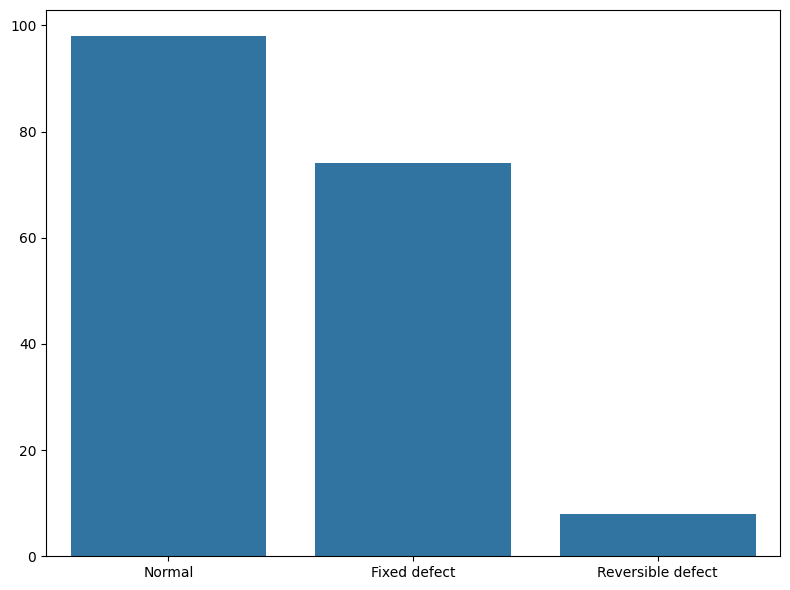

In [218]:
# Plot distribution of Thalassemia
normal = train_data[(train_data.thal==0)]
fixed_defect = train_data[(train_data.thal==1)]
reversible_defect = train_data[(train_data.thal==2)]

plt.figure(figsize=(8,6))
sns.barplot(x=['Normal', 'Fixed defect', 'Reversible defect'], y=[len(normal),len(fixed_defect),len(reversible_defect)])
plt.tight_layout()

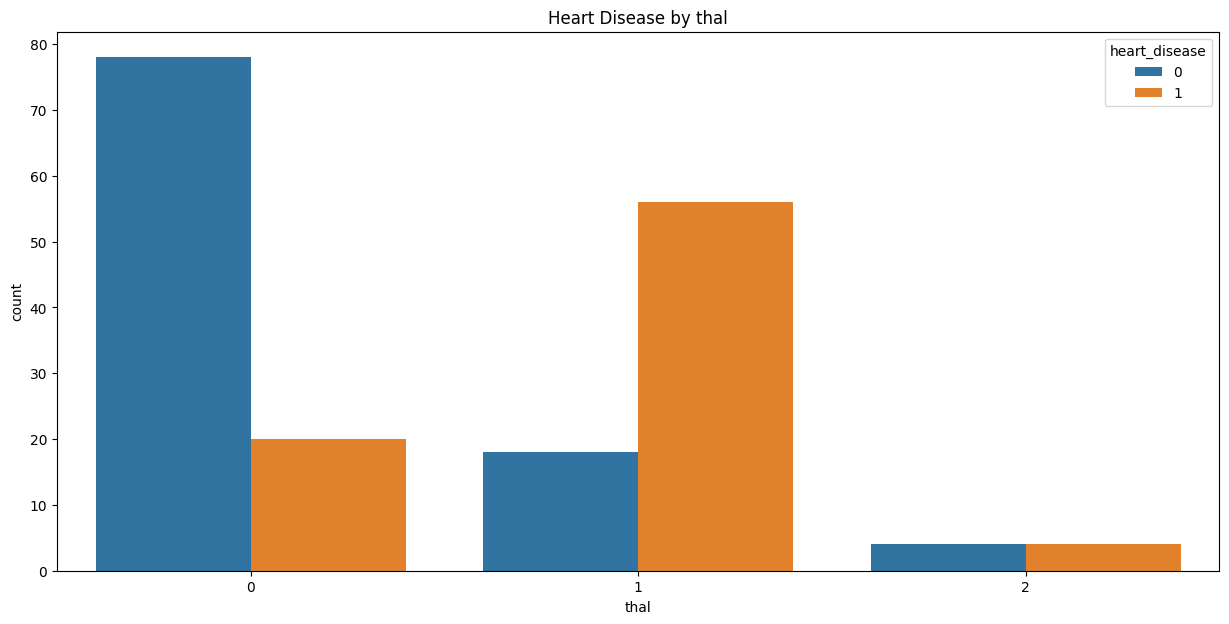

In [219]:
# Plot distribution of thal
plt.figure(figsize=(15,7))
sns.countplot(x = 'thal', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by thal")
plt.show()

##### 6. Max heart rate achieved

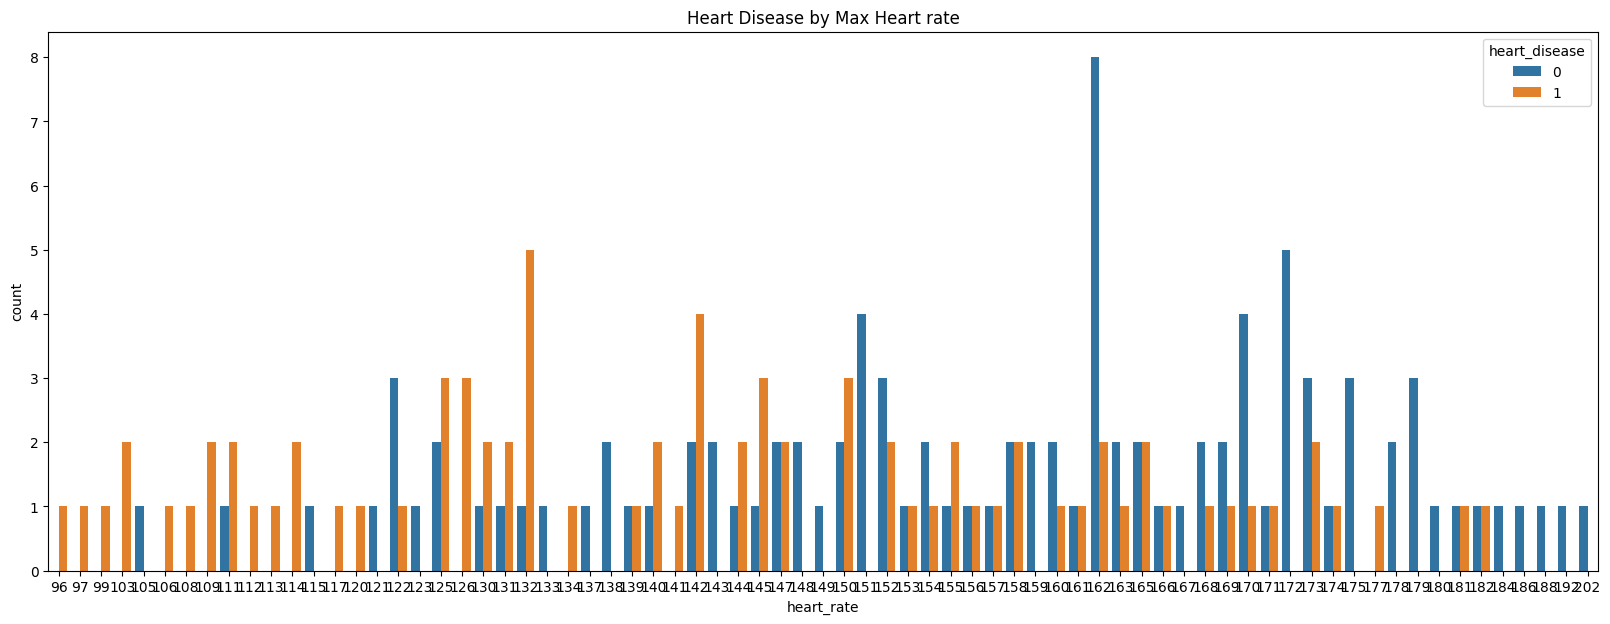

In [220]:
# Plot distribution of max_heart_rate_achieved
plt.figure(figsize=(20,7))
sns.countplot(x = 'heart_rate', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Max Heart rate")
plt.show()

In [221]:
minHeartRate = min(train_data.heart_rate)
maxHeartRate = max(train_data.heart_rate)
print('Min Heart rate :', minHeartRate)
print('Max Heart rate :', maxHeartRate)

Min Heart rate : 96
Max Heart rate : 202


##### 7. Depression induced by exercise relative to rest

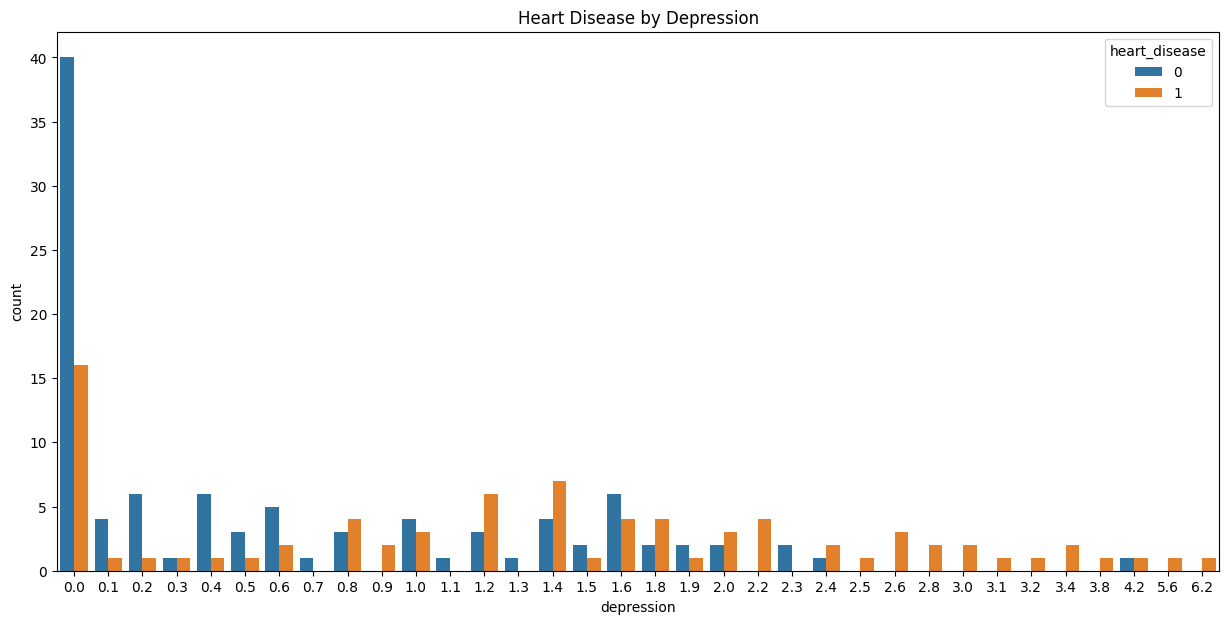

In [222]:
# Plot distribution of oldpeak_eq_st_depression
plt.figure(figsize=(15,7))
sns.countplot(x = 'depression', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Depression")
plt.show()

##### 8. Resting blood pressure

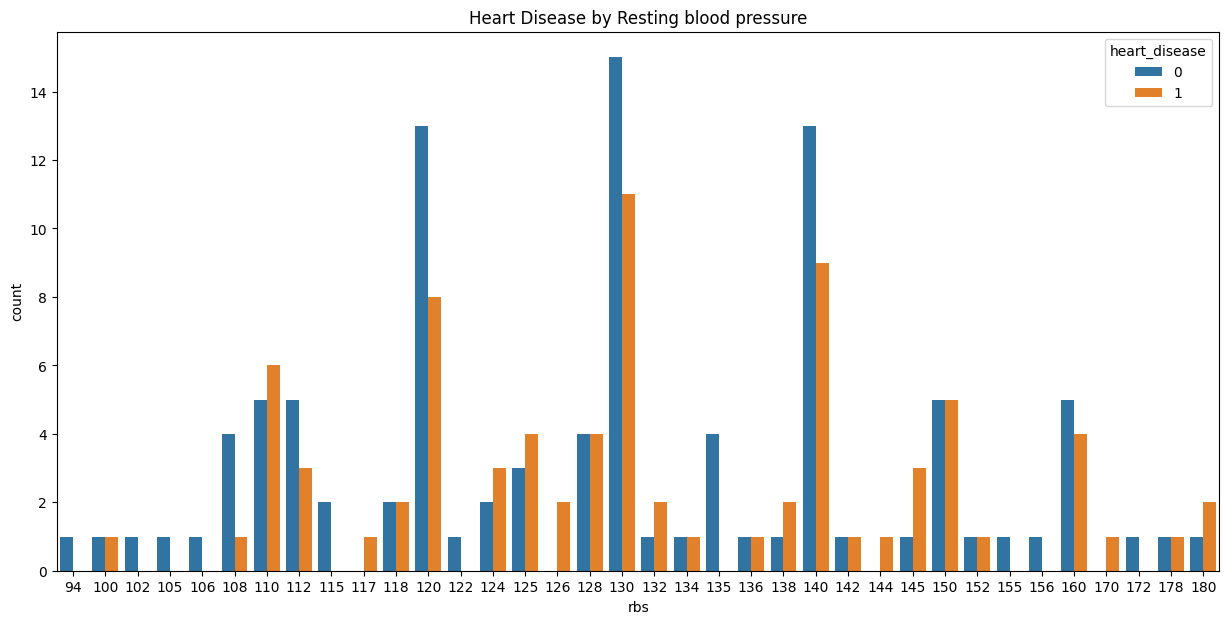

In [223]:
# Plot distribution of resting_blood_pressure
plt.figure(figsize=(15,7))
sns.countplot(x = 'rbs', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Resting blood pressure")
plt.show()

##### 9. Cholesterol level (mg/dl)

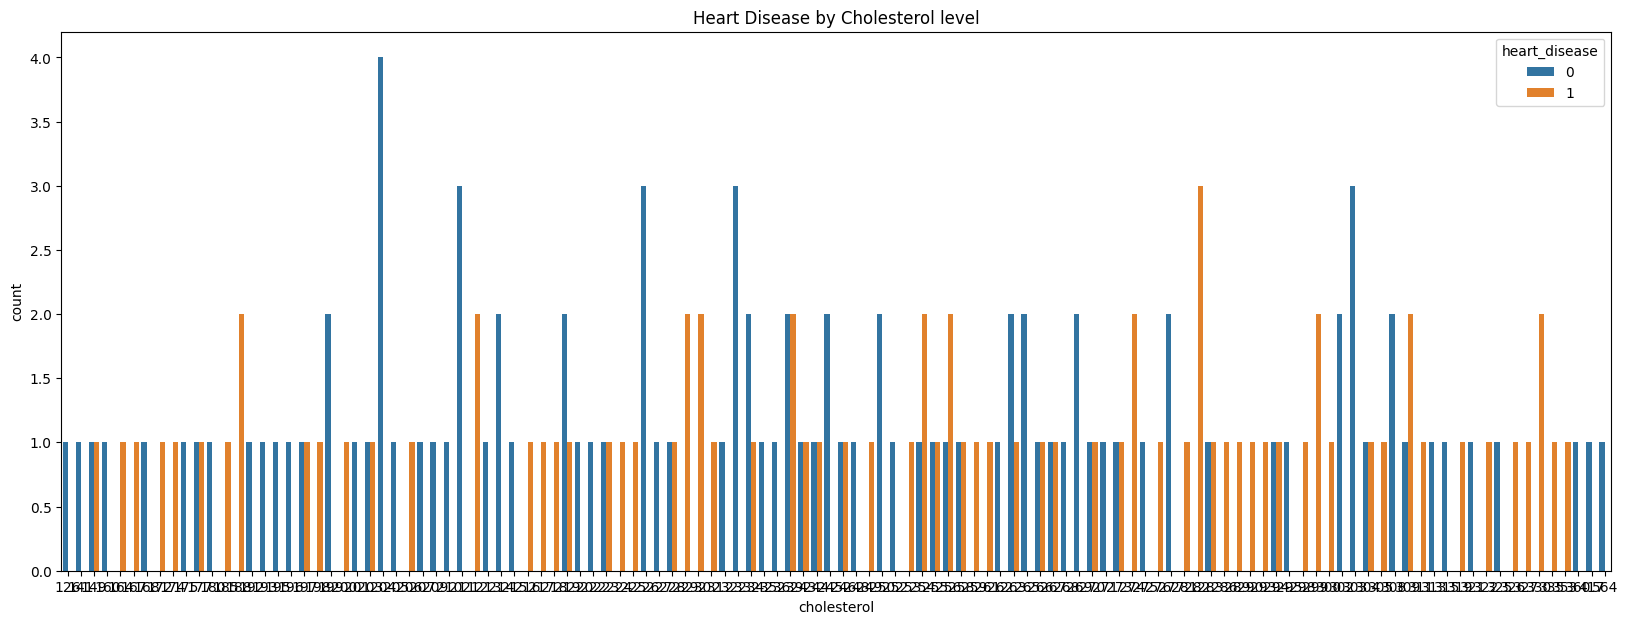

In [224]:
# Plot distribution of serum_cholesterol_mg_per_dl
plt.figure(figsize=(20,7))
sns.countplot(x = 'cholesterol', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Cholesterol level")
plt.show()

##### 10. Exercise-induced Angina

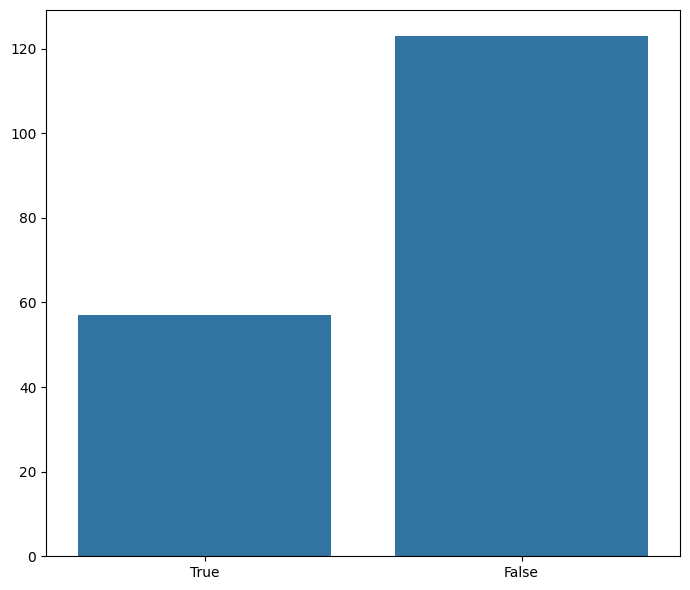

In [225]:
# Plot distribution of exercise_induced_angina
yes = train_data[(train_data.angina==1)]
no = train_data[(train_data.angina==0)]

plt.figure(figsize=(7,6))
sns.barplot(x=['True', 'False'], y=[len(yes),len(no)])
plt.tight_layout()

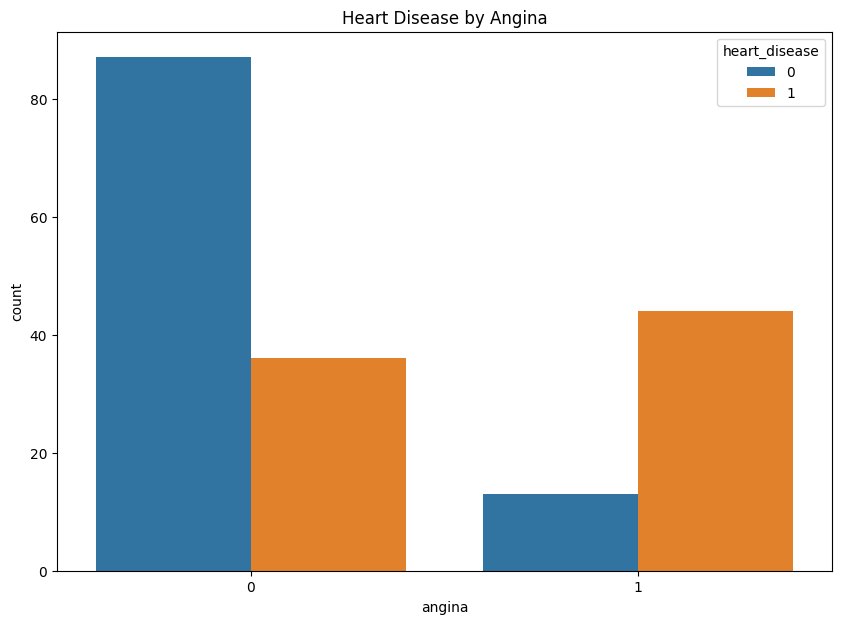

In [226]:
# Plot distribution of exercise_induced_angina
plt.figure(figsize=(10,7))
sns.countplot(x = 'angina', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Angina")
plt.show()

##### 11. Fasting blood sugar (> 120 mg/dl)

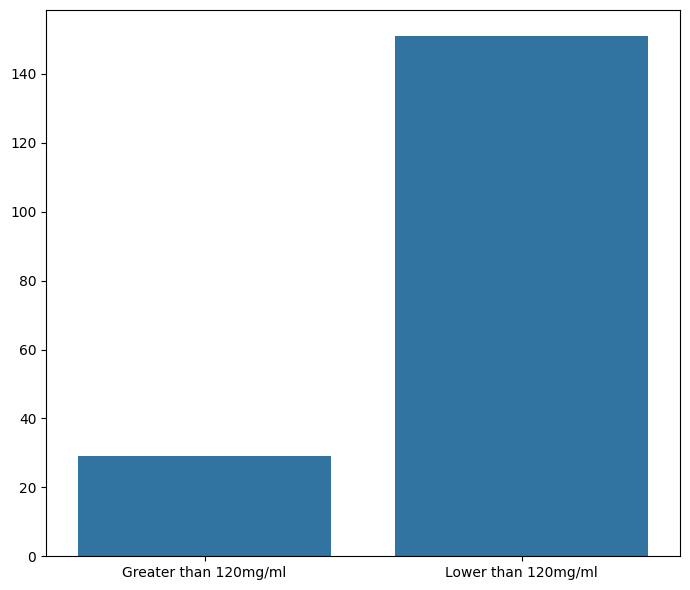

In [227]:
yes = train_data[(train_data.fasting_blood_sugar == 1)]
no = train_data[(train_data.fasting_blood_sugar == 0)]

plt.figure(figsize=(7,6))
sns.barplot(x=['Greater than 120mg/ml', 'Lower than 120mg/ml'], y=[len(yes),len(no)])
plt.tight_layout()

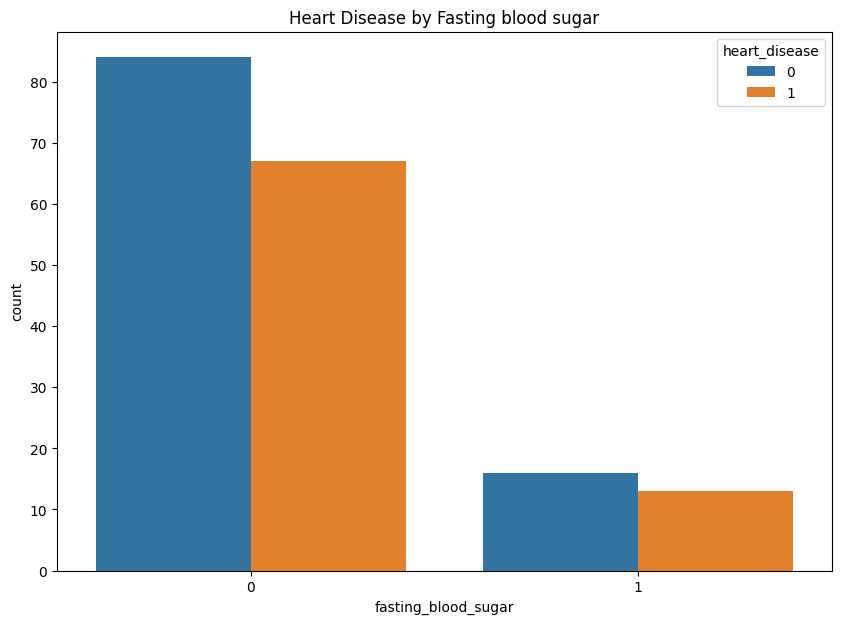

In [228]:
# Plot distribution of fasting_blood_sugar_gt_120_mg_per_dl
plt.figure(figsize=(10,7))
sns.countplot(x = 'fasting_blood_sugar', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Fasting blood sugar")
plt.show()

##### 12. Resting electrocardiography

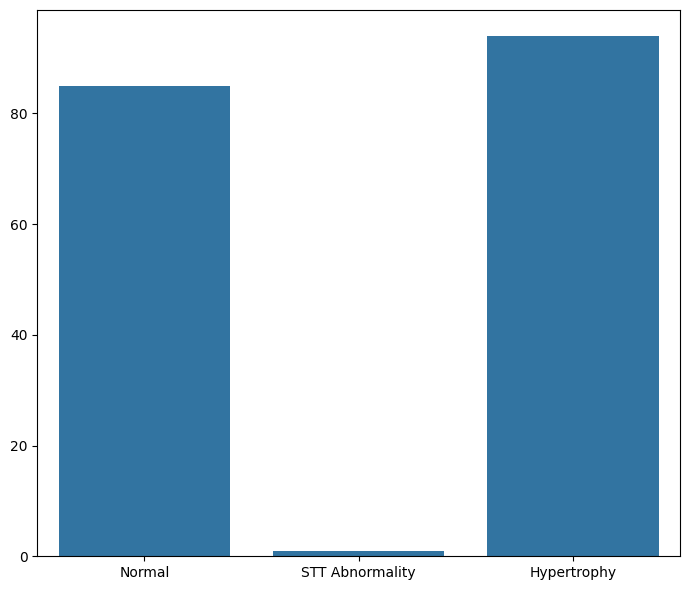

In [229]:
# Plot distribution of resting_ekg
normal = train_data[(train_data.resting_ekg == 0)]
abnormal = train_data[(train_data.resting_ekg == 1)]
hypertrophy = train_data[(train_data.resting_ekg == 2)]

plt.figure(figsize=(7,6))
sns.barplot(x=['Normal', 'STT Abnormality', 'Hypertrophy'], y=[len(normal),len(abnormal),len(hypertrophy)])
plt.tight_layout()

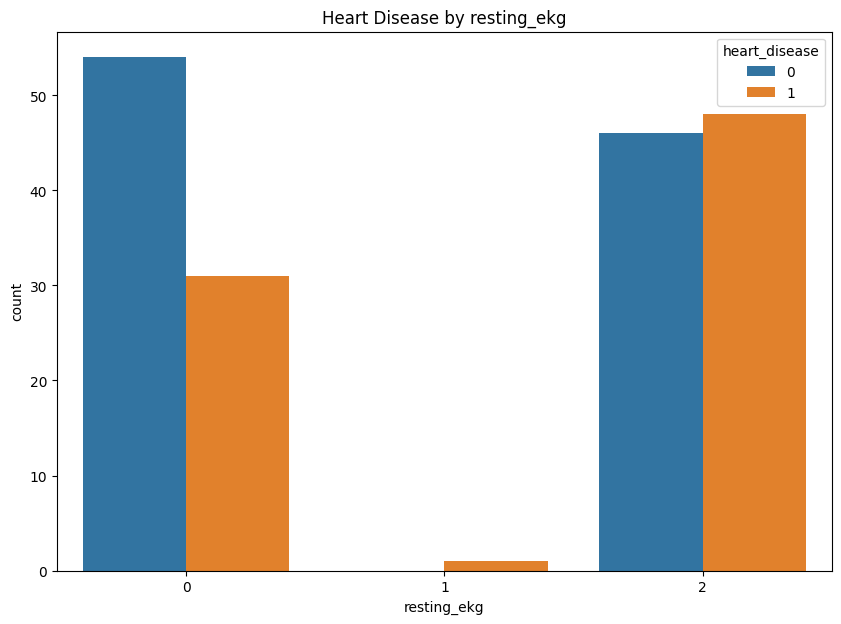

In [230]:
# Plot distribution of resting_ekg
plt.figure(figsize=(10,7))
sns.countplot(x = 'resting_ekg', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by resting_ekg")
plt.show()

##### 13. Vessels

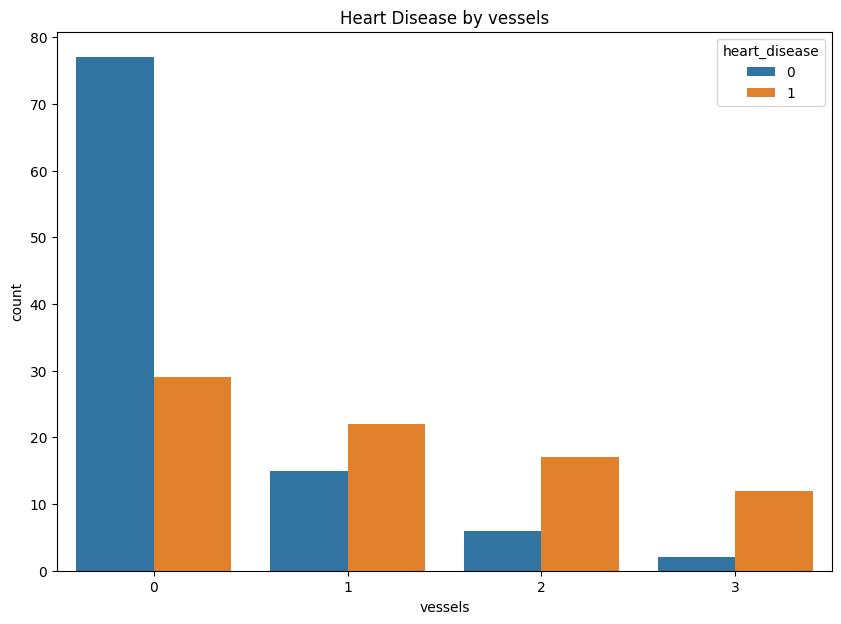

In [231]:
# Plot distribution of vessels
plt.figure(figsize=(10,7))
sns.countplot(x = 'vessels', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by vessels")
plt.show()

##### Target column

heart_disease
0    100
1     80
Name: count, dtype: int64


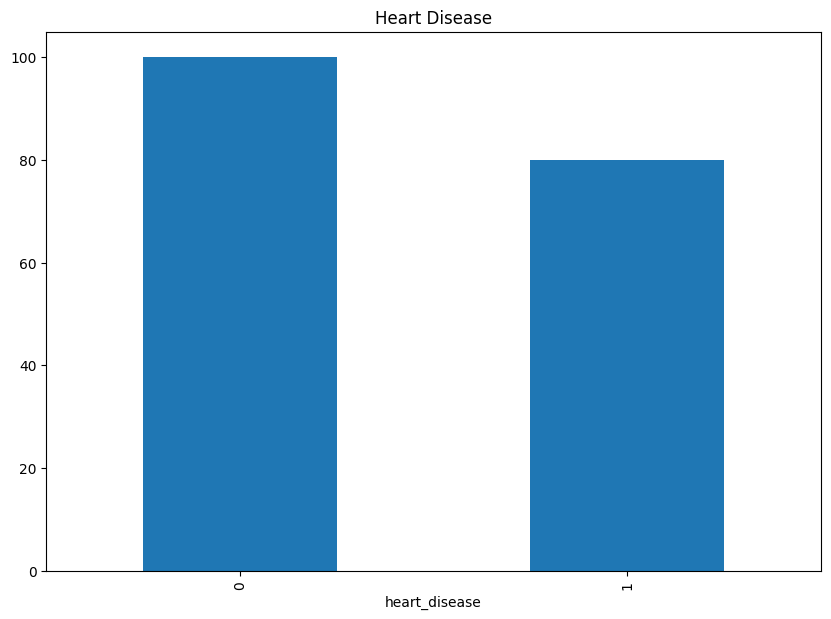

In [232]:
# Let’s check how well our outcome column is balanced
print(train_data['heart_disease'].value_counts())

plt.figure(figsize=(10,7))
train_data['heart_disease'].value_counts().plot(kind="bar")
plt.title("Heart Disease")
plt.show()

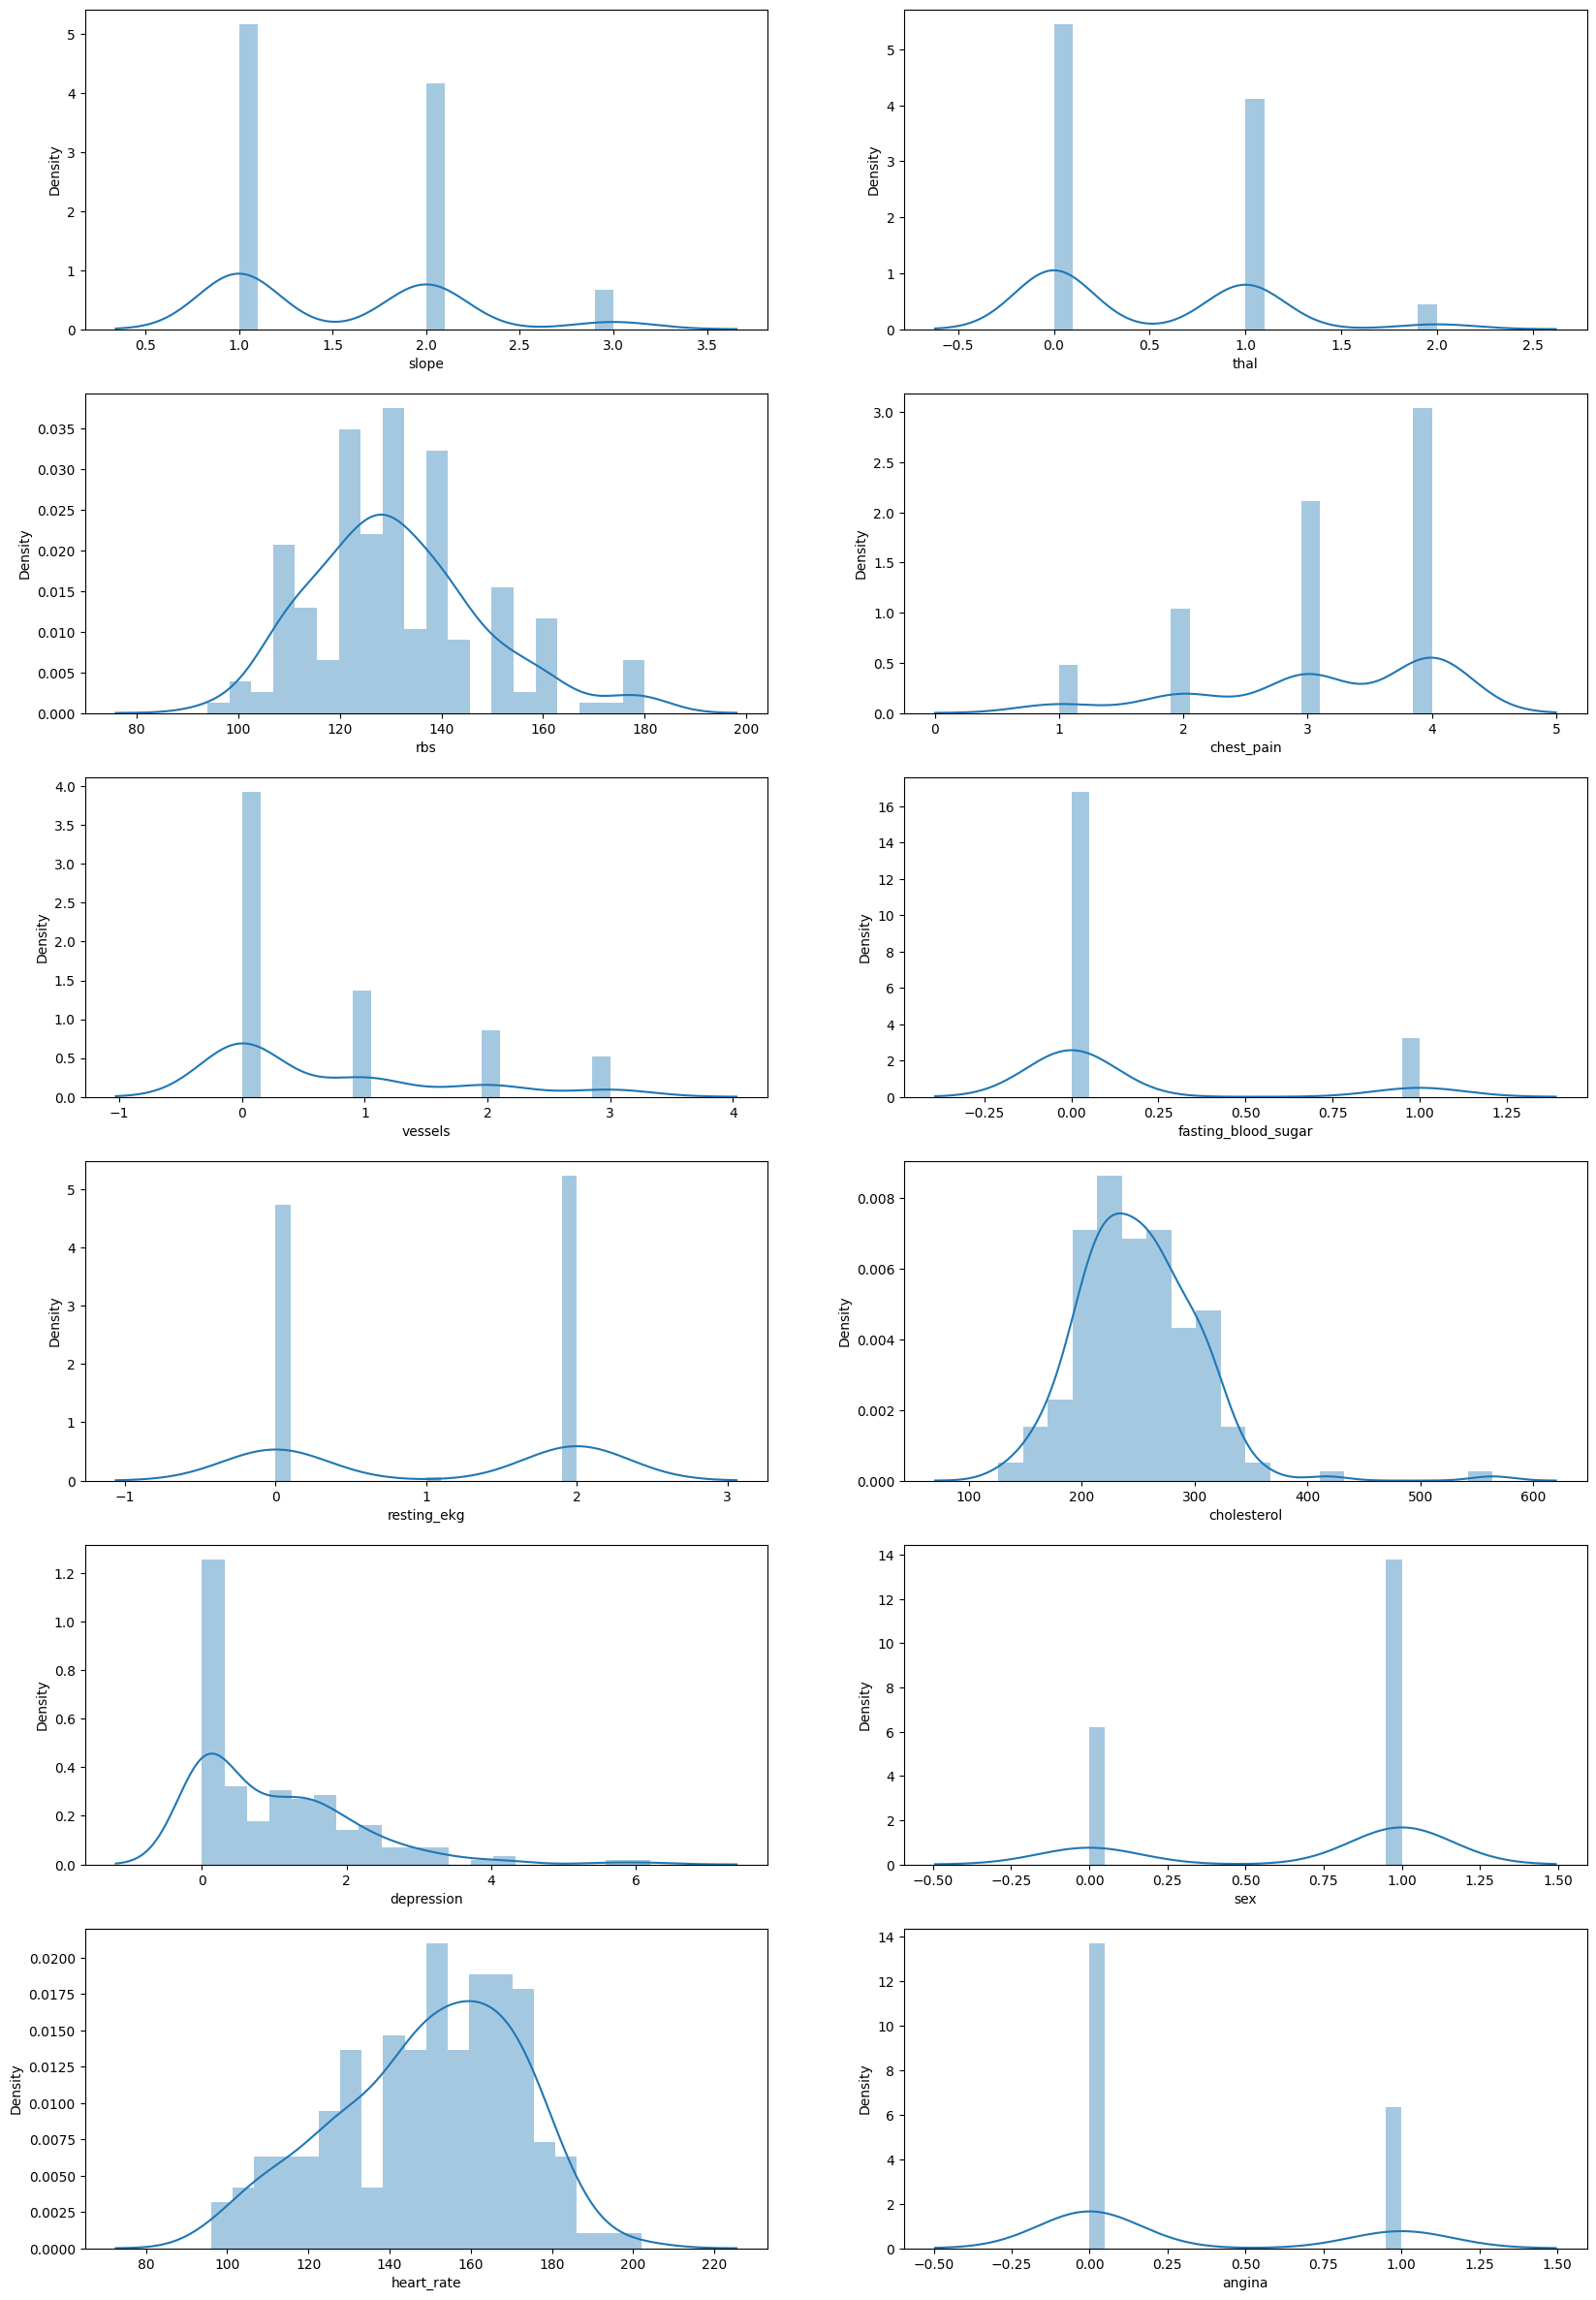

In [233]:
# Density graphs of all the attributes
fig, ax = plt.subplots(6,2, figsize=(20,30))

sns.distplot(train_data.slope, bins = 20, ax=ax[0,0])
sns.distplot(train_data.thal, bins = 20, ax=ax[0,1])
sns.distplot(train_data.rbs, bins = 20, ax=ax[1,0])
sns.distplot(train_data.chest_pain, bins = 20, ax=ax[1,1])
sns.distplot(train_data.vessels, bins = 20, ax=ax[2,0])
sns.distplot(train_data.fasting_blood_sugar, bins = 20, ax=ax[2,1])
sns.distplot(train_data.resting_ekg, bins = 20, ax=ax[3,0])
sns.distplot(train_data.cholesterol, bins = 20, ax=ax[3,1])
sns.distplot(train_data.depression, bins = 20, ax=ax[4,0])
sns.distplot(train_data.sex, bins = 20, ax=ax[4,1])
sns.distplot(train_data.heart_rate, bins = 20, ax=ax[5,0])
sns.distplot(train_data.angina, bins = 20, ax=ax[5,1])
plt.show()

In [234]:
# Check Skewness
from scipy.stats import skew
# Skewness is the measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.
# Skewness value between -0.5 to +0.5 is good, but anything between -1 and +1 is acceptable too.

print("Slope: ", skew(train_data['slope']))
print("Thal: ", skew(train_data['thal']))
print("Resting Blood Pressure: ", skew(train_data['rbs']))
print("Chest pain: ", skew(train_data['chest_pain']))
print("Major vessels: ", skew(train_data['vessels']))
print("Fasting Blood sugar: ", skew(train_data['fasting_blood_sugar']))
print("Resting ekg: ", skew(train_data['resting_ekg']))
print("Cholesterol: ", skew(train_data['cholesterol']))
print("Depression: ", skew(train_data['depression']))
print("Sex: ", skew(train_data['sex']))
print("Age: ", skew(train_data['age']))
print("Max Heart rate: ", skew(train_data['heart_rate']))
print("Angina: ", skew(train_data['angina']))

Slope:  0.660585714798187
Thal:  0.6758537716491559
Resting Blood Pressure:  0.6515915088698496
Chest pain:  -0.8421645409638178
Major vessels:  1.1582430715853718
Fasting Blood sugar:  1.8436240212843253
Resting ekg:  -0.10012405930078504
Cholesterol:  1.2632907841049
Depression:  1.4948214849547024
Sex:  -0.8160261132534429
Age:  -0.19750200100335744
Max Heart rate:  -0.3904163075399945
Angina:  0.7882318002900207


### Correlation Matrix

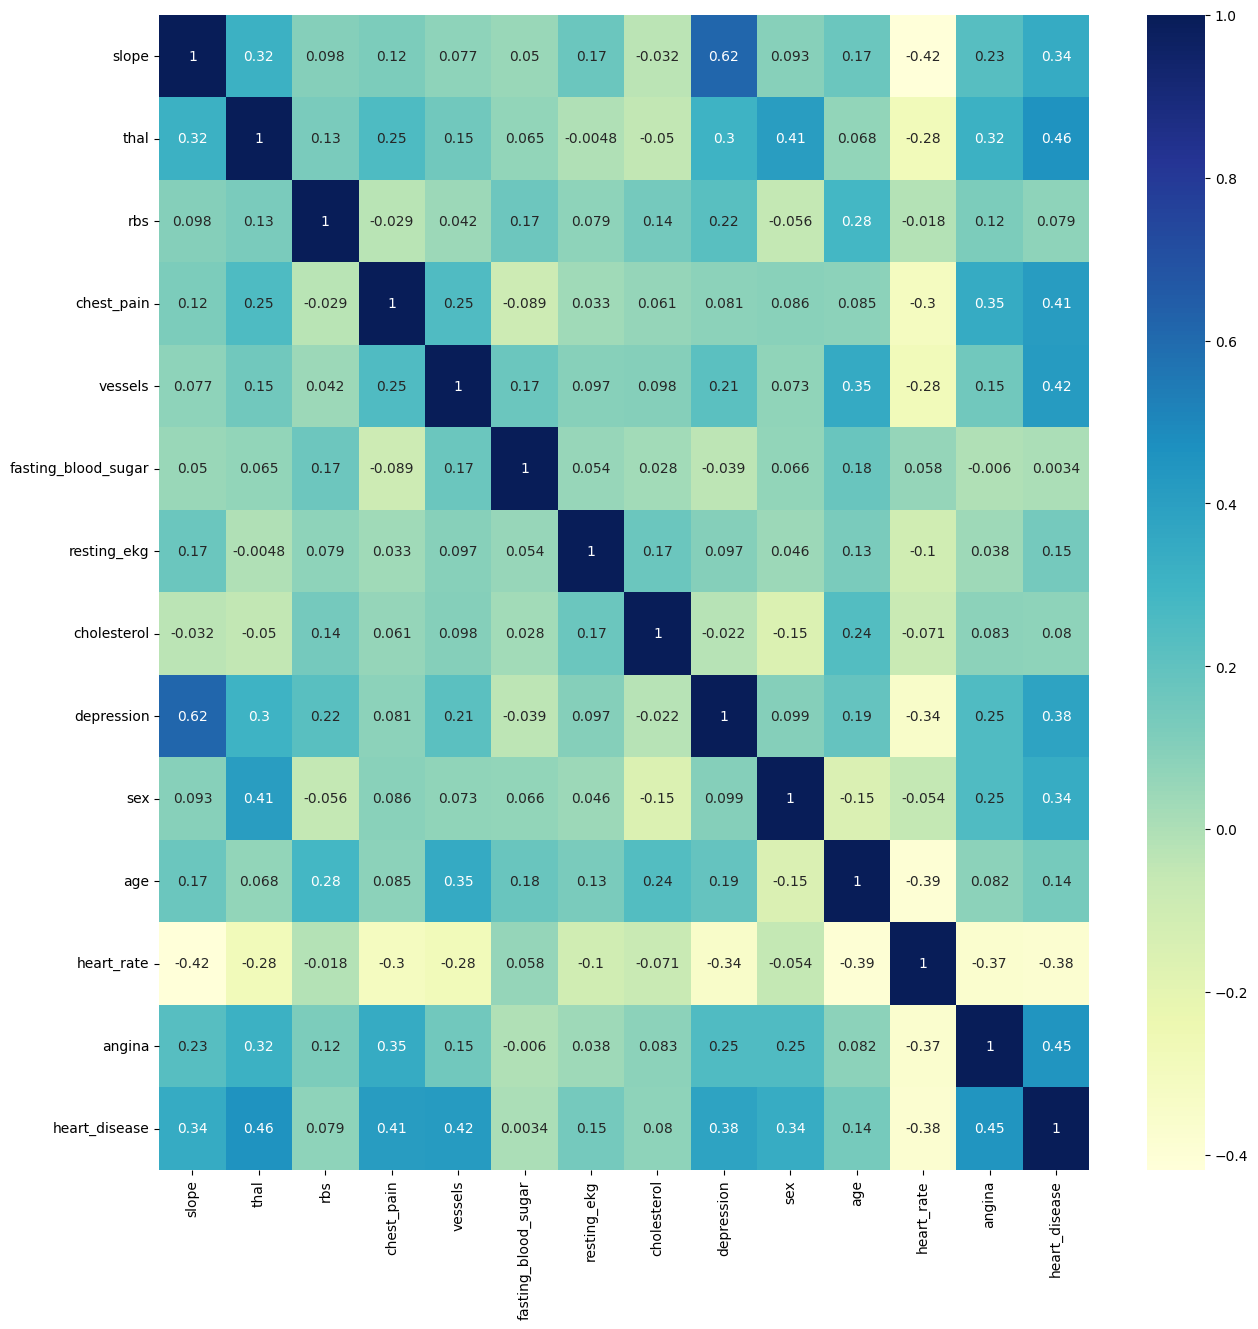

In [235]:
corr_matrix = train_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap = "YlGnBu")
plt.show()

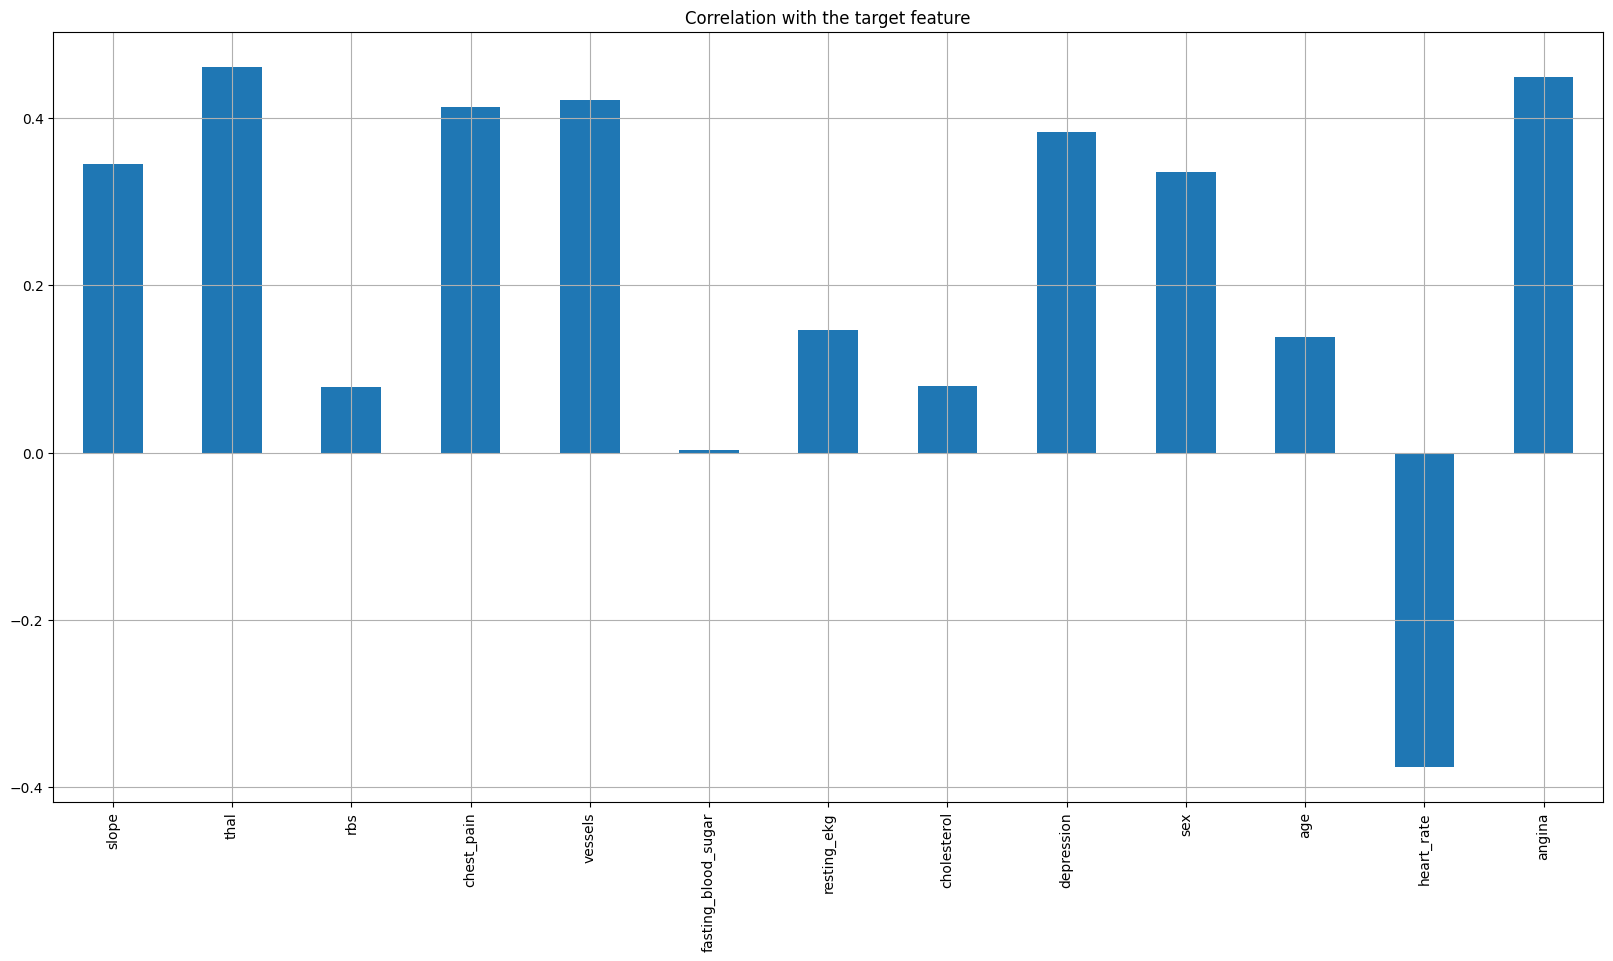

In [236]:
train_data.drop('heart_disease', axis=1).corrwith(train_data.heart_disease).plot(kind='bar', grid=True, figsize=(20, 10),
                                                                                 title="Correlation with the target feature")
plt.show()

In [237]:
# Only 1 feature 'heart_rate' is negatively correlated with the target feature
# 'fasting_blood_sugar' is the least correlated with the target variable.

### Data Processing

In [238]:
# Get the list of categorical values
print("Categorical features: ")
categorical_val

Categorical features: 


['slope',
 'thal',
 'chest_pain',
 'vessels',
 'fasting_blood_sugar',
 'resting_ekg',
 'sex',
 'angina',
 'heart_disease']

In [239]:
columns = ['slope', 'thal', 'rbs', 'chest_pain', 'vessels', 'fasting_blood_sugar',
           'resting_ekg', 'cholesterol', 'depression', 'sex', 'age', 'heart_rate', 'angina', 'heart_disease']
uniqueVal = []

for col in columns:
    if col in categorical_val:
        print(col,':', train_data[col].nunique())
        uniqueVal.append(train_data[col].nunique())

print('Total Unique values from categorical data: ', sum(uniqueVal))

slope : 3
thal : 3
chest_pain : 4
vessels : 4
fasting_blood_sugar : 2
resting_ekg : 3
sex : 2
angina : 2
heart_disease : 2
Total Unique values from categorical data:  25


#### One Hot Encoding

In [240]:
# One Hot encode the categorical columns
categorical_val.remove('heart_disease')
data = pd.get_dummies(train_data, columns = categorical_val)

print(data.shape)
data.head(5)

(180, 29)


,rbs,cholesterol,depression,age,heart_rate,heart_disease,slope_1,slope_2,slope_3,thal_0,...,vessels_3,fasting_blood_sugar_0,fasting_blood_sugar_1,resting_ekg_0,resting_ekg_1,resting_ekg_2,sex_0,sex_1,angina_0,angina_1
0,128,308,0.0,45,170,0,True,False,False,True,...,False,True,False,False,False,True,False,True,True,False
1,110,214,1.6,54,158,0,False,True,False,True,...,False,True,False,True,False,False,True,False,True,False
2,125,304,0.0,77,162,1,True,False,False,True,...,True,True,False,False,False,True,False,True,False,True
3,152,223,0.0,40,181,1,True,False,False,False,...,False,True,False,True,False,False,False,True,True,False
4,178,270,4.2,59,145,0,False,False,True,False,...,False,True,False,False,False,True,False,True,True,False


In [241]:
# Scale down i/p features for better results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
columns_to_scale = ['age', 'rbs', 'cholesterol', 'heart_rate', 'depression']
data[columns_to_scale] = sc.fit_transform(data[columns_to_scale])

In [242]:
print(data.shape)
data.head(5)

(180, 29)


,rbs,cholesterol,depression,age,heart_rate,heart_disease,slope_1,slope_2,slope_3,thal_0,...,vessels_3,fasting_blood_sugar_0,fasting_blood_sugar_1,resting_ekg_0,resting_ekg_1,resting_ekg_2,sex_0,sex_1,angina_0,angina_1
0,-0.195195,1.118269,-0.903207,-1.053964,0.932485,0,True,False,False,True,...,False,True,False,False,False,True,False,True,True,False
1,-1.256320,-0.669778,0.527616,-0.087134,0.387084,0,False,True,False,True,...,False,True,False,True,False,False,True,False,True,False
2,-0.372049,1.042182,-0.903207,2.383654,0.568884,1,True,False,False,True,...,True,True,False,False,False,True,False,True,False,True
3,1.219639,-0.498582,-0.903207,-1.591092,1.432436,1,True,False,False,False,...,False,True,False,True,False,False,False,True,True,False
4,2.752375,0.395442,2.852703,0.449994,-0.203768,0,False,False,True,False,...,False,True,False,False,False,True,False,True,True,False


### Cleaning our test dataset

In [243]:
test_data.head(5)

,patient_id,slope,thal,rbs,chest_pain,vessels,fasting_blood_sugar,resting_ekg,cholesterol,depression,sex,age,heart_rate,angina
0,olalu7,2,1,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,0,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,1,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,0,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,0,138,4,1,0,2,166,3.6,1,61,125,1


In [244]:
categorical_test_val = []
continous_test_val = []

for column in test_data.columns:
    if len(test_data[column].unique()) <= 10:
        categorical_test_val.append(column)
    else:
        continous_test_val.append(column)

In [245]:
# Get the list of categorical values
print("Categorical features: ")
categorical_test_val

Categorical features: 


['slope',
 'thal',
 'chest_pain',
 'vessels',
 'fasting_blood_sugar',
 'resting_ekg',
 'sex',
 'angina']

In [246]:
columns = ['slope', 'thal', 'rbs', 'chest_pain', 'vessels', 'fasting_blood_sugar',
           'resting_ekg', 'cholesterol', 'depression', 'sex', 'age', 'heart_rate', 'angina', 'heart_disease']
uniqueTestVal = []

for col in columns:
    if col in categorical_test_val:
        print(col,':', test_data[col].nunique())
        uniqueTestVal.append(test_data[col].nunique())

print('Total Unique values from categorical data: ', sum(uniqueTestVal))

slope : 3
thal : 3
chest_pain : 4
vessels : 4
fasting_blood_sugar : 2
resting_ekg : 3
sex : 2
angina : 2
Total Unique values from categorical data:  23


In [247]:
# One Hot encode the categorical columns
test_set = pd.get_dummies(test_data, columns = categorical_test_val)

print(test_set.shape)
test_set.head(5)

(90, 29)


,patient_id,rbs,cholesterol,depression,age,heart_rate,slope_1,slope_2,slope_3,thal_0,...,vessels_3,fasting_blood_sugar_0,fasting_blood_sugar_1,resting_ekg_0,resting_ekg_1,resting_ekg_2,sex_0,sex_1,angina_0,angina_1
0,olalu7,170,288,0.2,59,159,False,True,False,False,...,False,True,False,False,False,True,False,True,True,False
1,z9n6mx,138,183,1.4,35,182,True,False,False,True,...,False,True,False,True,False,False,True,False,True,False
2,5k4413,120,177,2.5,43,120,False,True,False,False,...,False,True,False,False,False,True,False,True,False,True
3,mrg7q5,102,318,0.0,60,160,True,False,False,True,...,False,True,False,True,False,False,True,False,True,False
4,uki4do,138,166,3.6,61,125,False,True,False,True,...,False,True,False,False,False,True,False,True,False,True


In [248]:
# Drop 'patient_id'
test_set = test_set.drop(['patient_id'], axis=1)
print(test_set.shape)
test_set.head(5)

(90, 28)


,rbs,cholesterol,depression,age,heart_rate,slope_1,slope_2,slope_3,thal_0,thal_1,...,vessels_3,fasting_blood_sugar_0,fasting_blood_sugar_1,resting_ekg_0,resting_ekg_1,resting_ekg_2,sex_0,sex_1,angina_0,angina_1
0,170,288,0.2,59,159,False,True,False,False,True,...,False,True,False,False,False,True,False,True,True,False
1,138,183,1.4,35,182,True,False,False,True,False,...,False,True,False,True,False,False,True,False,True,False
2,120,177,2.5,43,120,False,True,False,False,True,...,False,True,False,False,False,True,False,True,False,True
3,102,318,0.0,60,160,True,False,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,138,166,3.6,61,125,False,True,False,True,False,...,False,True,False,False,False,True,False,True,False,True


### Building our model

In [249]:
# Define the 'features' and 'labels'
X = data.drop('heart_disease', axis='columns')
y = data['heart_disease']

In [250]:
# Define train : test dataset in 70 : 30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression model

In [251]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

# Train the model on the training set
log_model.fit(X_train, y_train)

# Make predictions on the training and testing set
y_pred = log_model.predict(X_train)
y_pred1 = log_model.predict(X_test)

In [252]:
# evaluating our model
from sklearn.metrics import classification_report, confusion_matrix

print("Train Result:\n")
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

print("\nTest Result:\n")
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

Train Result:

[[70  5]
 [ 8 43]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        75
           1       0.90      0.84      0.87        51

    accuracy                           0.90       126
   macro avg       0.90      0.89      0.89       126
weighted avg       0.90      0.90      0.90       126


Test Result:

[[25  0]
 [ 9 20]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        25
           1       1.00      0.69      0.82        29

    accuracy                           0.83        54
   macro avg       0.87      0.84      0.83        54
weighted avg       0.88      0.83      0.83        54



In [253]:
from sklearn.metrics import accuracy_score

train_score = accuracy_score(y_train, y_pred)*100
test_score = accuracy_score(y_test, y_pred1)*100

# Create a dataframe to display accuracy
results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]],
                          columns=['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
results_df

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Logistic Regression,89.68254,83.333333


In [254]:
# Calculate the log loss -> lower loss scores are better
from sklearn.metrics import log_loss

clf_probs = log_model.predict_proba(X_test)
score = log_loss(y_test, clf_probs)
print(score)

0.43711883251869077


### Support Vector Machine (SVM) model

In [255]:
from sklearn.svm import SVC

svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_train, y_train))

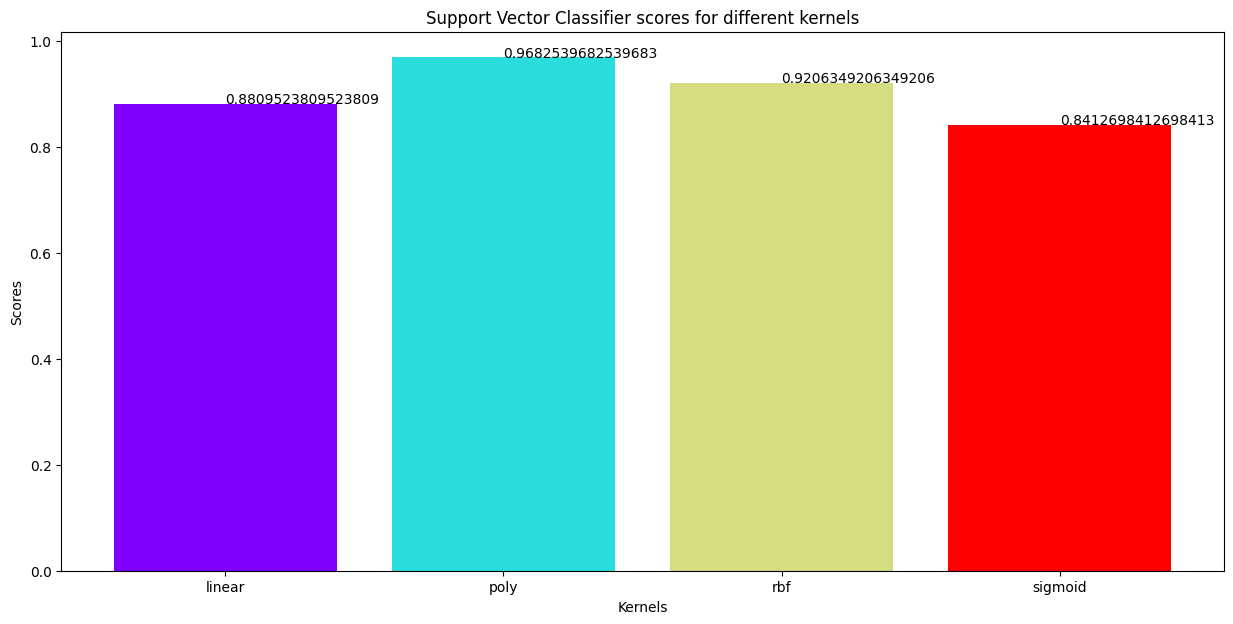

In [256]:
from matplotlib.cm import rainbow

plt.figure(figsize=(15,7))
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)

for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')
plt.show()

In [257]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', gamma=0.01, C=1, probability=True)

# Train the model on the training set
svm.fit(X_train, y_train)

# Make predictions on the training and testing set
y_pred2 = svm.predict(X_train)
y_pred3 = svm.predict(X_test)

In [258]:
# evaluating our model
from sklearn.metrics import classification_report, confusion_matrix

print("Train Result:\n")
print(confusion_matrix(y_train, y_pred2))
print(classification_report(y_train, y_pred2))

print("\nTest Result:\n")
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

Train Result:

[[69  6]
 [10 41]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90        75
           1       0.87      0.80      0.84        51

    accuracy                           0.87       126
   macro avg       0.87      0.86      0.87       126
weighted avg       0.87      0.87      0.87       126


Test Result:

[[24  1]
 [ 9 20]]
              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.95      0.69      0.80        29

    accuracy                           0.81        54
   macro avg       0.84      0.82      0.81        54
weighted avg       0.85      0.81      0.81        54



In [259]:
from sklearn.metrics import accuracy_score

train_score = accuracy_score(y_train, y_pred2)*100
test_score = accuracy_score(y_test, y_pred3)*100

# Create a dataframe to display accuracy
results_df1 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]],
                          columns=['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
results_df1

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Support Vector Machine,87.301587,81.481481


In [260]:
from sklearn.metrics import log_loss
clf_probs = svm.predict_proba(X_test)
score = log_loss(y_test, clf_probs)
print(score)

0.4394705160784521


In [261]:
results_df = pd.concat([results_df, results_df1], ignore_index=True)
results_df

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Logistic Regression,89.682540,83.333333
1,Support Vector Machine,87.301587,81.481481


### Random Forest Classifier

In [262]:
# Import Random Forest model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

# Train the model on the training set
rfc.fit(X_train, y_train)

# Make predictions on the training and testing set
y_pred4 = rfc.predict(X_train)
y_pred5 = rfc.predict(X_test)

In [263]:
# evaluating our model
from sklearn.metrics import classification_report, confusion_matrix

print("Train Result:\n")
print(confusion_matrix(y_train, y_pred4))
print(classification_report(y_train, y_pred4))

print("\nTest Result:\n")
print(confusion_matrix(y_test, y_pred5))
print(classification_report(y_test, y_pred5))

Train Result:

[[75  0]
 [ 0 51]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        51

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126


Test Result:

[[23  2]
 [10 19]]
              precision    recall  f1-score   support

           0       0.70      0.92      0.79        25
           1       0.90      0.66      0.76        29

    accuracy                           0.78        54
   macro avg       0.80      0.79      0.78        54
weighted avg       0.81      0.78      0.78        54



In [264]:
from sklearn.metrics import accuracy_score

train_score = accuracy_score(y_train, y_pred4)*100
test_score = accuracy_score(y_test, y_pred5)*100

# Create a dataframe to display accuracy
results_df2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
results_df2

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Random Forest Classifier,100.0,77.777778


In [265]:
from sklearn.metrics import log_loss
clf_probs = rfc.predict_proba(X_test)
score = log_loss(y_test, clf_probs)
print(score)

0.5011617123840199


In [266]:
results_df = pd.concat([results_df, results_df2], ignore_index=True)
results_df

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Logistic Regression,89.682540,83.333333
1,Support Vector Machine,87.301587,81.481481
2,Random Forest Classifier,100.000000,77.777778


### XGBoost Classifier

In [267]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(max_depth=5)

# Train the model on the training set
xgb_clf.fit(X_train, y_train)

# Make predictions on the training and testing set
y_pred6 = xgb_clf.predict(X_train)
y_pred7 = xgb_clf.predict(X_test)

In [268]:
from sklearn.metrics import accuracy_score

train_score = accuracy_score(y_train, y_pred6)*100
test_score = accuracy_score(y_test, y_pred7)*100

# Create a dataframe to display accuracy
results_df3 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
results_df3

,Model,Training Accuracy(%),Testing Accuracy(%)
0,XGBoost Classifier,100.0,85.185185


##### Hyperparameter tuning in XGBoost Classifier

In [269]:
# Hyperparameter tuning
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
        'max_depth': [4, 5, 6, 7],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3, 1],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'n_estimators': [100, 200, 500, 1000]}

fit_params = {'eval_set': [(X_train, y_train)]}

In [270]:
clf = xgb.XGBClassifier(eval_metric='logloss', early_stopping_rounds = 10)

clf_cv = RandomizedSearchCV(clf, param_grid, verbose=2, n_jobs=-1, scoring='neg_log_loss', cv=2)

# Train the model on the training set
clf_cv.fit(X_train, y_train, **fit_params)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[0]	validation_0-logloss:0.60429
[1]	validation_0-logloss:0.56123
[2]	validation_0-logloss:0.52188
[3]	validation_0-logloss:0.49102
[4]	validation_0-logloss:0.46291
[5]	validation_0-logloss:0.44418
[6]	validation_0-logloss:0.42243
[7]	validation_0-logloss:0.40292
[8]	validation_0-logloss:0.38907
[9]	validation_0-logloss:0.38269
[10]	validation_0-logloss:0.37360
[11]	validation_0-logloss:0.36504
[12]	validation_0-logloss:0.35583
[13]	validation_0-logloss:0.34731
[14]	validation_0-logloss:0.33851
[15]	validation_0-logloss:0.33271
[16]	validation_0-logloss:0.32828
[17]	validation_0-logloss:0.32535
[18]	validation_0-logloss:0.31334
[19]	validation_0-logloss:0.31033
[20]	validation_0-logloss:0.30616
[21]	validation_0-logloss:0.30341
[22]	validation_0-logloss:0.30041
[23]	validation_0-logloss:0.30025
[24]	validation_0-logloss:0.30066
[25]	validation_0-logloss:0.29832
[26]	validation_0-logloss:0.29353
[27]	validation_0-logloss:0.290

RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=10,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_r...
                   param_distributions={'colsample_bylevel': [0.4, 0.5, 0.6,
                                                              0.7, 0.8, 0.9,
                                                              1.0],
                                        'colsample_bytree': [0.4, 0.5, 0.6, 0.7,
                                                             0.8, 0.9, 1.0],
                                        'gamma': [0, 0.25, 0.5, 1.0],
                                        'learning_rate': [0.001, 0.01, 0.1, 0.2,
                                                          0, 3, 1],
                                        'max_depth': [4, 5, 6, 7],
                                        'min_child_weight': [0.5, 1.0, 3.0, 5.0,
                                                             7.0, 10.0],
                                        'n_estimators': [100, 200, 500, 1000],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1.0]},
                   scoring='neg_log_loss', verbose=2)

In [271]:
best_score = clf_cv.best_score_
best_params = clf_cv.best_params_

print("Best score: {}".format(best_score))
print("Best parameters: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: -0.426616028285561
Best parameters: 
colsample_bylevel: 0.9
colsample_bytree: 1.0
gamma: 1.0
learning_rate: 0.2
max_depth: 4
min_child_weight: 3.0
n_estimators: 100
subsample: 0.6


##### XGBoost with optimal hyperparameters

In [272]:
# XGBoost with optimal hyperparameters
clf = xgb.XGBClassifier(gamma=0, learning_rate=0.2, max_depth=6, n_estimators=1000, subsample=0.5,
                        colsample_bylevel=0.6, colsample_bytree=0.4, min_child_weight=1.0)

# Train the model on the training set
clf.fit(X_train, y_train)

# Make predictions on the training and testing set
y_pred8 = clf.predict(X_train)
y_pred9 = clf.predict(X_test)

In [273]:
print("Score: ", clf.score(X_test, y_test))

Score:  0.8703703703703703


In [274]:
from sklearn.metrics import accuracy_score

train_score = accuracy_score(y_train, y_pred8)*100
test_score = accuracy_score(y_test, y_pred9)*100

# Create a dataframe to display accuracy
results_df4 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
results_df4

,Model,Training Accuracy(%),Testing Accuracy(%)
0,XGBoost Classifier,100.0,87.037037


In [275]:
from sklearn.metrics import log_loss
clf_probs = clf.predict_proba(X_test)
score = log_loss(y_test, clf_probs)
print(score)

0.6749883542108377


In [276]:
results_df = pd.concat([results_df, results_df4], ignore_index=True)
results_df

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Logistic Regression,89.682540,83.333333
1,Support Vector Machine,87.301587,81.481481
2,Random Forest Classifier,100.000000,77.777778
3,XGBoost Classifier,100.000000,87.037037


### LightGBM Classifier

In [277]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

lgb_clf = LGBMClassifier(n_estimators=20, num_leaves = 38)

# Train the model on the training set
lgb_clf.fit(X_train, y_train)

# Make predictions on the training and testing set
y_pred10 = lgb_clf.predict(X_train)
y_pred11 = lgb_clf.predict(X_test)

[LightGBM] [Info] Number of positive: 51, number of negative: 75
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 126, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.404762 -> initscore=-0.385662
[LightGBM] [Info] Start training from score -0.385662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [278]:
from sklearn.metrics import accuracy_score

train_score = accuracy_score(y_train, y_pred10)*100
test_score = accuracy_score(y_test, y_pred11)*100

# Create a dataframe to display accuracy
results_df5 = pd.DataFrame(data=[["LightGBM Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
results_df5

,Model,Training Accuracy(%),Testing Accuracy(%)
0,LightGBM Classifier,90.47619,81.481481


##### Hyperparameter tuning in LightGBM Classifier

In [279]:
# Hyperparameter tuning
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

search_params = {
        'max_depth': [4, 5, 6],
        'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2],
        'subsample': [0.8, 0.9, 1.0],
        'num_leaves': [30, 40, 50, 60],
        'n_estimators': [x for x in range(20, 150, 2)]}

In [280]:
estimator = lgb.LGBMClassifier()

grid = RandomizedSearchCV(estimator, search_params, verbose=2, n_jobs=-1, cv=2)

# Train the model on the training set
grid.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[LightGBM] [Info] Number of positive: 51, number of negative: 75
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 126, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.404762 -> initscore=-0.385662
[LightGBM] [Info] Start training from score -0.385662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

RandomizedSearchCV(cv=2, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.125, 0.15,
                                                          0.175, 0.2],
                                        'max_depth': [4, 5, 6],
                                        'n_estimators': [20, 22, 24, 26, 28, 30,
                                                         32, 34, 36, 38, 40, 42,
                                                         44, 46, 48, 50, 52, 54,
                                                         56, 58, 60, 62, 64, 66,
                                                         68, 70, 72, 74, 76, 78, ...],
                                        'num_leaves': [30, 40, 50, 60],
                                        'subsample': [0.8, 0.9, 1.0]},
                   verbose=2)

In [281]:
best_score = grid.best_score_
best_params = grid.best_params_

print("Best score: {}".format(best_score))
print("Best parameters: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: 0.7936507936507937
Best parameters: 
learning_rate: 0.15
max_depth: 6
n_estimators: 86
num_leaves: 40
subsample: 0.9


##### LightGBM Classifier with optimal hyperparameters

In [282]:
# LightGBM with optimal hyperparameters
estimator = lgb.LGBMClassifier(learning_rate=0.2, max_depth=5, n_estimators=42, num_leaves=50, subsample=0.8)

# Train the model on the training set
estimator.fit(X_train, y_train)

# Make predictions on the training and testing set
y_pred12 = estimator.predict(X_train)
y_pred13 = estimator.predict(X_test)

[LightGBM] [Info] Number of positive: 51, number of negative: 75
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 126, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.404762 -> initscore=-0.385662
[LightGBM] [Info] Start training from score -0.385662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [283]:
print("Score: ", estimator.score(X_test, y_test))

Score:  0.8703703703703703


In [284]:
from sklearn.metrics import accuracy_score

train_score = accuracy_score(y_train, y_pred12)*100
test_score = accuracy_score(y_test, y_pred13)*100

# Create a dataframe to display accuracy
results_df6 = pd.DataFrame(data=[["LightGBM Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
results_df6

,Model,Training Accuracy(%),Testing Accuracy(%)
0,LightGBM Classifier,98.412698,87.037037


In [285]:
from sklearn.metrics import log_loss
clf_probs = estimator.predict_proba(X_test)
score = log_loss(y_test, clf_probs)
print(score)

0.481247637969546


In [286]:
results_df = pd.concat([results_df, results_df6], ignore_index=True)
results_df

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Logistic Regression,89.682540,83.333333
1,Support Vector Machine,87.301587,81.481481
2,Random Forest Classifier,100.000000,77.777778
3,XGBoost Classifier,100.000000,87.037037
4,LightGBM Classifier,98.412698,87.037037


### Stacking Classifier

In [287]:
import mlxtend
from mlxtend.classifier import StackingClassifier

# Fit the base and meta models
sclf = StackingClassifier(classifiers=[svm, clf], meta_classifier=estimator)

# Train the model on the training set
sclf.fit(X_train, y_train)

# Make predictions on the training and testing set
y_pred14 = sclf.predict(X_train)
y_pred15 = sclf.predict(X_test)

[LightGBM] [Info] Number of positive: 51, number of negative: 75
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4
[LightGBM] [Info] Number of data points in the train set: 126, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.404762 -> initscore=-0.385662
[LightGBM] [Info] Start training from score -0.385662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [288]:
print("Score: ", sclf.score(X_test, y_test))

Score:  0.8703703703703703


In [289]:
from sklearn.metrics import accuracy_score

train_score = accuracy_score(y_train, y_pred14)*100
test_score = accuracy_score(y_test, y_pred15)*100

# Create a dataframe to display accuracy
results_df7 = pd.DataFrame(data=[["Stacking Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
results_df7

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Stacking Classifier,100.0,87.037037


In [290]:
from sklearn.metrics import log_loss
clf_probs = sclf.predict_proba(X_test)
score = log_loss(y_test, clf_probs)
print(score)

1.2069969728636532


In [291]:
results_df = pd.concat([results_df, results_df7], ignore_index=True)
results_df

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Logistic Regression,89.682540,83.333333
1,Support Vector Machine,87.301587,81.481481
2,Random Forest Classifier,100.000000,77.777778
3,XGBoost Classifier,100.000000,87.037037
4,LightGBM Classifier,98.412698,87.037037
5,Stacking Classifier,100.000000,87.037037


### Voting Classifier

In [292]:
from sklearn.ensemble import VotingClassifier

# ensemble of models
classifiers = [('svc', svm), ('xgb', clf), ('lgbm', estimator)]

# Voting Classifier with hard voting
models = VotingClassifier(estimators = classifiers, voting = 'hard')

# Train the model on the training set
models.fit(X_train, y_train)

# Make predictions on the training and testing set
y_pred16 = models.predict(X_train)
y_pred17 = models.predict(X_test)

[LightGBM] [Info] Number of positive: 51, number of negative: 75
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 126, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.404762 -> initscore=-0.385662
[LightGBM] [Info] Start training from score -0.385662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [293]:
print("Score: ", models.score(X_test, y_test))

Score:  0.8888888888888888


In [294]:
from sklearn.metrics import accuracy_score

train_score = accuracy_score(y_train, y_pred16)*100
test_score = accuracy_score(y_test, y_pred17)*100

# Create a dataframe to display accuracy
results_df8 = pd.DataFrame(data=[["Voting Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
results_df8

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Voting Classifier,98.412698,88.888889


In [295]:
results_df = pd.concat([results_df, results_df8], ignore_index=True)
results_df

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Logistic Regression,89.682540,83.333333
1,Support Vector Machine,87.301587,81.481481
2,Random Forest Classifier,100.000000,77.777778
3,XGBoost Classifier,100.000000,87.037037
4,LightGBM Classifier,98.412698,87.037037
5,Stacking Classifier,100.000000,87.037037
6,Voting Classifier,98.412698,88.888889


### Saving our models

In [296]:
import pickle

# First, we will use the dump() function to save the model using pickle
saved_model1 = pickle.dumps(log_model)
saved_model2 = pickle.dumps(svm)
saved_model3 = pickle.dumps(rfc)
saved_model4 = pickle.dumps(xgb_clf)
saved_model5 = pickle.dumps(lgb_clf)
saved_model6 = pickle.dumps(sclf)
saved_model7 = pickle.dumps(models)

# Then, we will load that saved model
log_from_pickle = pickle.loads(saved_model1)
svm_from_pickle = pickle.loads(saved_model2)
rfc_from_pickle = pickle.loads(saved_model3)
xgb_from_pickle = pickle.loads(saved_model4)
lgb_from_pickle = pickle.loads(saved_model5)
sclf_from_pickle = pickle.loads(saved_model6)
voting_from_pickle = pickle.loads(saved_model7)

### Making predictions

In [297]:
# Finally, after loading that model we will use this to make predictions
pred = xgb_from_pickle.predict(X_test)

In [298]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df.head(10)

,Actual,Predicted
19,1,0
42,0,0
153,1,1
78,1,1
145,0,0
15,1,1
24,0,0
68,0,0
113,1,0
118,1,1


In [299]:
# Make predictions on the test data set now
final_pred = xgb_from_pickle.predict(test_set)

In [300]:
submission = pd.DataFrame({
        "patient_id": test_data["patient_id"],
        "heart_disease_present": final_pred
})

In [308]:
export_csv = submission.to_csv(r'/content/predictions.csv',
                               index=None, header=True)
print("Successfully Exported!!")

Successfully Exported!!


#### Get the prediction probabilities for each class

In [302]:
pred1 = log_model.predict_proba(test_set)
pred2 = svm.predict_proba(test_set)
pred3 = rfc.predict_proba(test_set)
pred4 = xgb_clf.predict_proba(test_set)
pred5 = lgb_clf.predict_proba(test_set)

final_pred = (pred1+pred2+pred3+pred4+pred5)/5

In [303]:
prob_df = pd.DataFrame(final_pred, columns=['0','1'])
prob_df.head(10)

,0,1
0,0.446760,0.553240
1,0.507737,0.492263
2,0.178048,0.821952
3,0.621885,0.378115
4,0.241389,0.758611
5,0.574445,0.425555
6,0.505145,0.494855
7,0.236393,0.763607
8,0.479171,0.520829
9,0.584673,0.415327


In [304]:
submissions = pd.DataFrame({
        "patient_id": test_data["patient_id"],
        "heart_disease_present_probability": prob_df["1"]
})

In [309]:
export_csv=submissions.to_csv(r'/prediction probabilities.csv',
                              index=None, header=True)
print("Successfully Exported!!")

Successfully Exported!!


### Visualizing predicted values

In [306]:
pred_df = pd.read_csv(r"/content/predictions.csv")

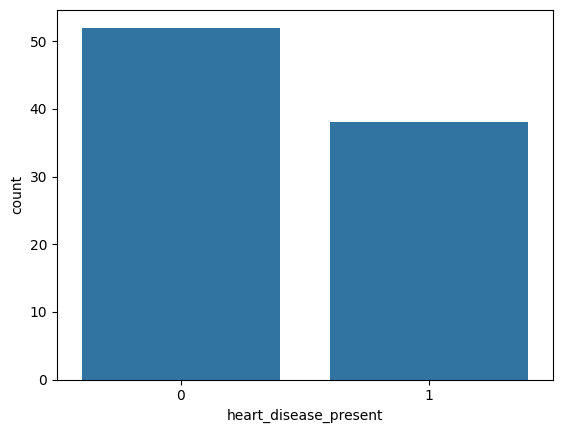

In [307]:
sns.countplot(x="heart_disease_present", data=pred_df)
plt.show()